# PROJECT


## Domain : Banking

## Module : Churn Modeling
https://github.com/mulla-arbas-ahammed/churn-modeling

### Problem Statement :

Customer churn or customer attrition is a tendency of clients or customers to abandon a brand and stop being a paying client of a particular business or organization. The percentage of customers that discontinue using a company’s services or products during a specific period is called a customer churn rate. Several bad experiences (or just one) are enough, and a customer may quit. And if a large chunk of unsatisfied customers churn at a time interval, both material losses and damage to reputation would be enormous.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Dataset Description :
 
Inside the dataset, there are 10000 rows and 14 different columns.

The target column here is **Exited** here.

The details about all the columns are given in the following data dictionary -

Variable --> Definition 

RowNumber --> Unique Row Number 

CustomerId --> Unique Customer Id

Surname -> Surname of a customer 

CreditScore --> Credit Score of each Customer

Geography --> Geographical Location of Customers

City_Category --> Category of the City (A,B,C)

Gender --> Sex of Customers

Age | Age of Each Customer

Tenure --> Number of years 

Balance --> Current Balance of Customers 

NumOfProducts --> Number of Products 

HasCrCard --> If a customer has a credit card or not 

IsActiveMember --> If a customer is active or not 

EstimatedSalary --> Estimated Salary of each Customer 

**Exited** --> **Customer left the bank or Not (Target Variable)** 





In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
continuous=df[["Age","Balance","EstimatedSalary"]]
continuous

Age    Balance  EstimatedSalary
0      42       0.00        101348.88
1      41   83807.86        112542.58
2      42  159660.80        113931.57
3      39       0.00         93826.63
4      43  125510.82         79084.10
...   ...        ...              ...
9995   39       0.00         96270.64
9996   35   57369.61        101699.77
9997   36       0.00         42085.58
9998   42   75075.31         92888.52
9999   28  130142.79         38190.78

[10000 rows x 3 columns]

In [9]:
discrete=df[["CreditScore","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]]
discrete

CreditScore  Tenure  NumOfProducts  HasCrCard  IsActiveMember
0             619       2              1          1               1
1             608       1              1          0               1
2             502       8              3          1               0
3             699       1              2          0               0
4             850       2              1          1               1
...           ...     ...            ...        ...             ...
9995          771       5              2          1               0
9996          516      10              1          1               1
9997          709       7              1          0               1
9998          772       3              2          1               0
9999          792       4              1          1               0

[10000 rows x 5 columns]

### Exploratory Data Analysis(EDA)
- Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data.
- These patterns include outliers and features of the data that might be unexpected. 
- EDA is an important first step in any data analysis.
-  By using EDA we can find nulls,outliers and visualize the dataset

In [10]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [13]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [14]:
df.shape

(10000, 11)

In [15]:
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [16]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
df[["Gender"]].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
df["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [19]:
df["Tenure"].nunique()

11

In [20]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [21]:
df["HasCrCard"].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [22]:
df["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [23]:
df[["Exited"]].value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

In [24]:
pd.crosstab(df.Exited,df.Geography)

Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413

In [25]:
pd.crosstab(df.Exited,df.Gender)

Gender  Female  Male
Exited              
0         3404  4559
1         1139   898

In [26]:
pd.crosstab(df.Exited,df.Tenure)

Tenure   0    1    2    3    4    5    6    7    8    9    10
Exited                                                       
0       318  803  847  796  786  803  771  851  828  771  389
1        95  232  201  213  203  209  196  177  197  213  101

In [27]:
pd.crosstab(df.Exited,df.HasCrCard)

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424

In [28]:
pd.crosstab(df.Exited,df.NumOfProducts)

NumOfProducts     1     2    3   4
Exited                            
0              3675  4242   46   0
1              1409   348  220  60

In [29]:
pd.crosstab(df.Exited,df.IsActiveMember)

IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735

### Visualization

#####  Univariate plots are the plots which requires only one variable or one column at a time to plot a graph
- Histogram, BoxPlot are applicable for continuous data and it is used for "Univariate plots"
#####  Bivariate plots are the plots which requires two variables or two columns at a time to plot a graph 
- Scatter, LinePlot  are applicable for Continuous data and  these are used for "Bivariate plots"
#####  Multivariate plots are the plots which requires more than two variables or columns to plot a graph 
- PiePlot, BarPlot are applicable for  Discrete data and thse are used "Univariate plots"


##### Histogram
- A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. 
- This allows the inspection of the data for its underlying distribution (e.g. normal distribution), outliers, skewness, etc.

Text(0.5, 1.0, 'Histogram')

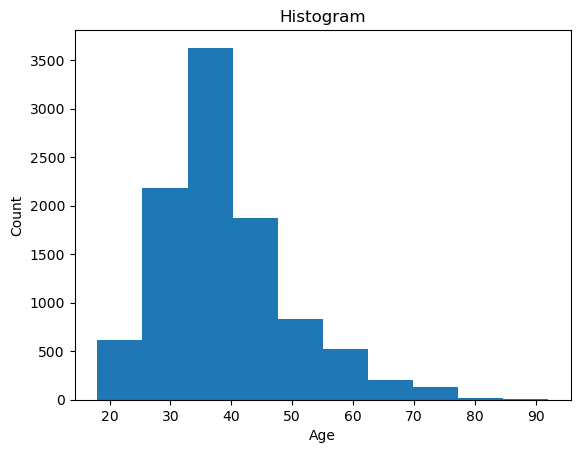

In [30]:
plt.hist(df["Age"],histtype='barstacked')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram")

In [31]:
df['EstimatedSalary'].skew()

0.0020853576615585162

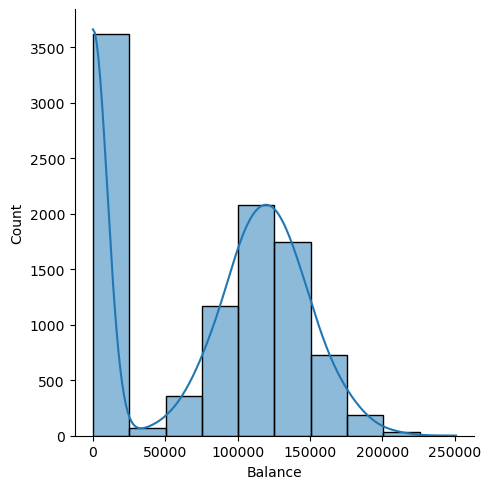

In [32]:
sns.displot(df["Balance"],bins=10,kde=True)
plt.show()

In [33]:
df['Balance'].skew()

-0.14110871094154384

Text(0.5, 1.0, 'Histogram')

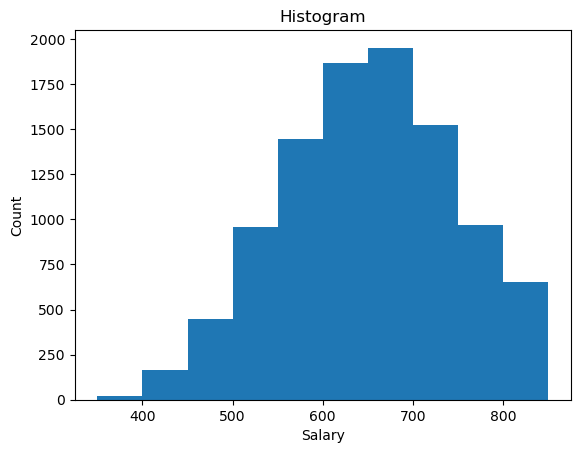

In [34]:
plt.hist(df["CreditScore"])
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Histogram")

##### Box Plot
- It determine the central tendency, the variability, the quartiles, and the skewness for your data.
- A box plot chart shows the distribution of a set of data. 
- It shows the distribution features of raw data.

<Figure size 1000x500 with 0 Axes>

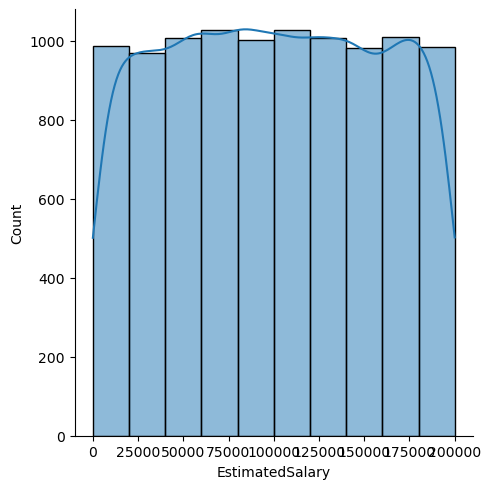

In [35]:
plt.figure(figsize=(10,5))
sns.displot(df["EstimatedSalary"],bins=10,kde=True)
plt.show()

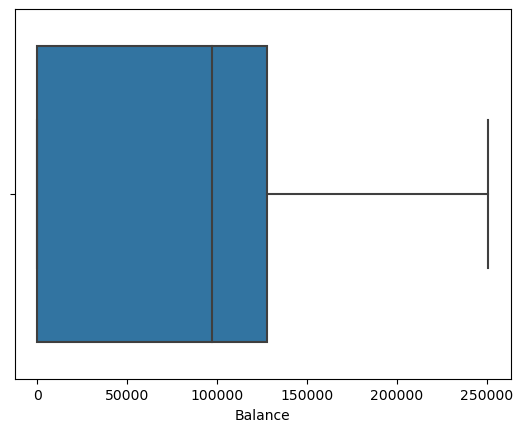

In [36]:
sns.boxplot(x=df["Balance"])
plt.show()

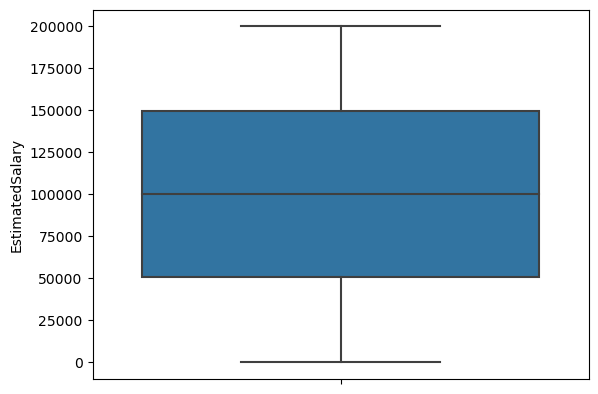

In [37]:
sns.boxplot(y="EstimatedSalary",hue="Gender",data=df)
plt.show()

##### Scatter Plot
- A scatter plot is used to obtain the correlational relationship between two numerical variables. 
- The positioning of the data points, called markers, allows us to infer if there is a correlation between the variables. 
- It also depicts the direction and the strength of this correlation.

<Figure size 1000x500 with 0 Axes>

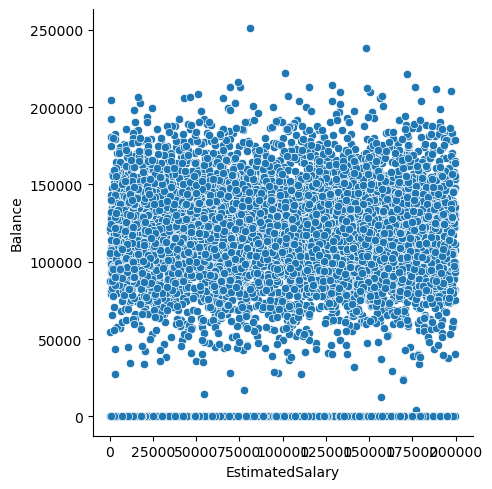

In [38]:
plt.figure(figsize=(10,5))
sns.relplot(x='EstimatedSalary',y="Balance",data=df)
plt.show()

<Figure size 1000x500 with 0 Axes>

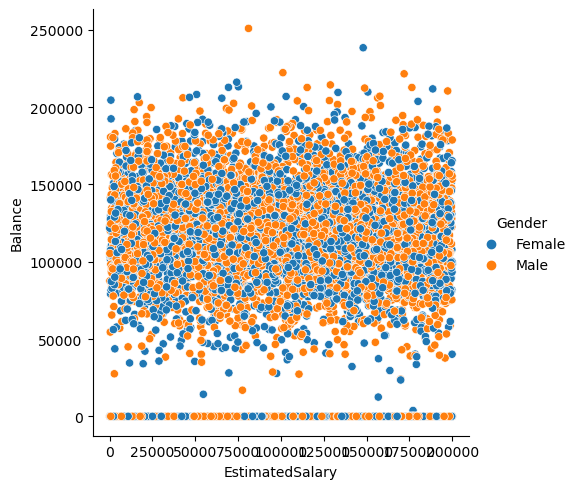

In [39]:
plt.figure(figsize=(10,5))
sns.relplot(x='EstimatedSalary',y="Balance",data=df,hue="Gender")
plt.show()

<Figure size 1000x500 with 0 Axes>

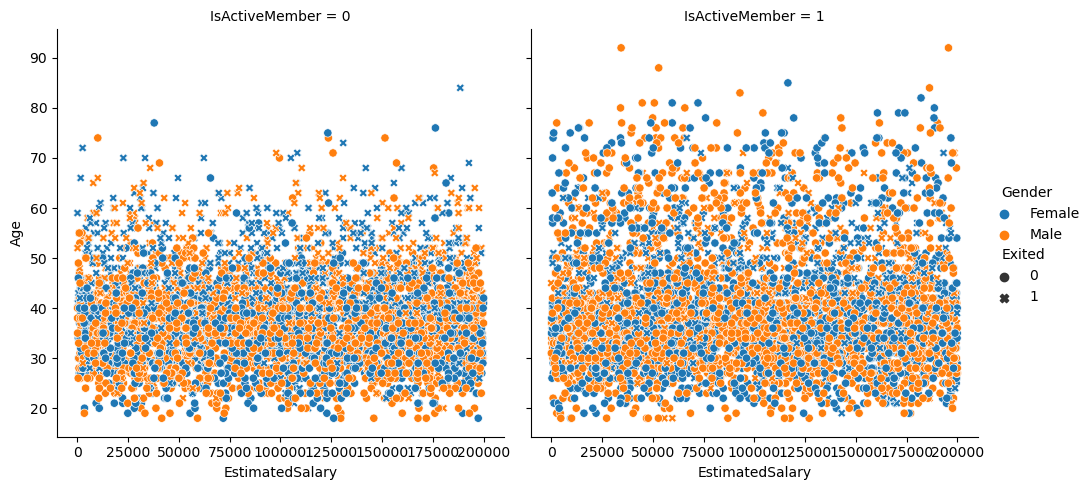

In [40]:
plt.figure(figsize=(10,5))
sns.relplot(x='EstimatedSalary',y="Age",data=df,hue="Gender",style="Exited",col="IsActiveMember",col_wrap=2)
plt.show()

<Figure size 1000x500 with 0 Axes>

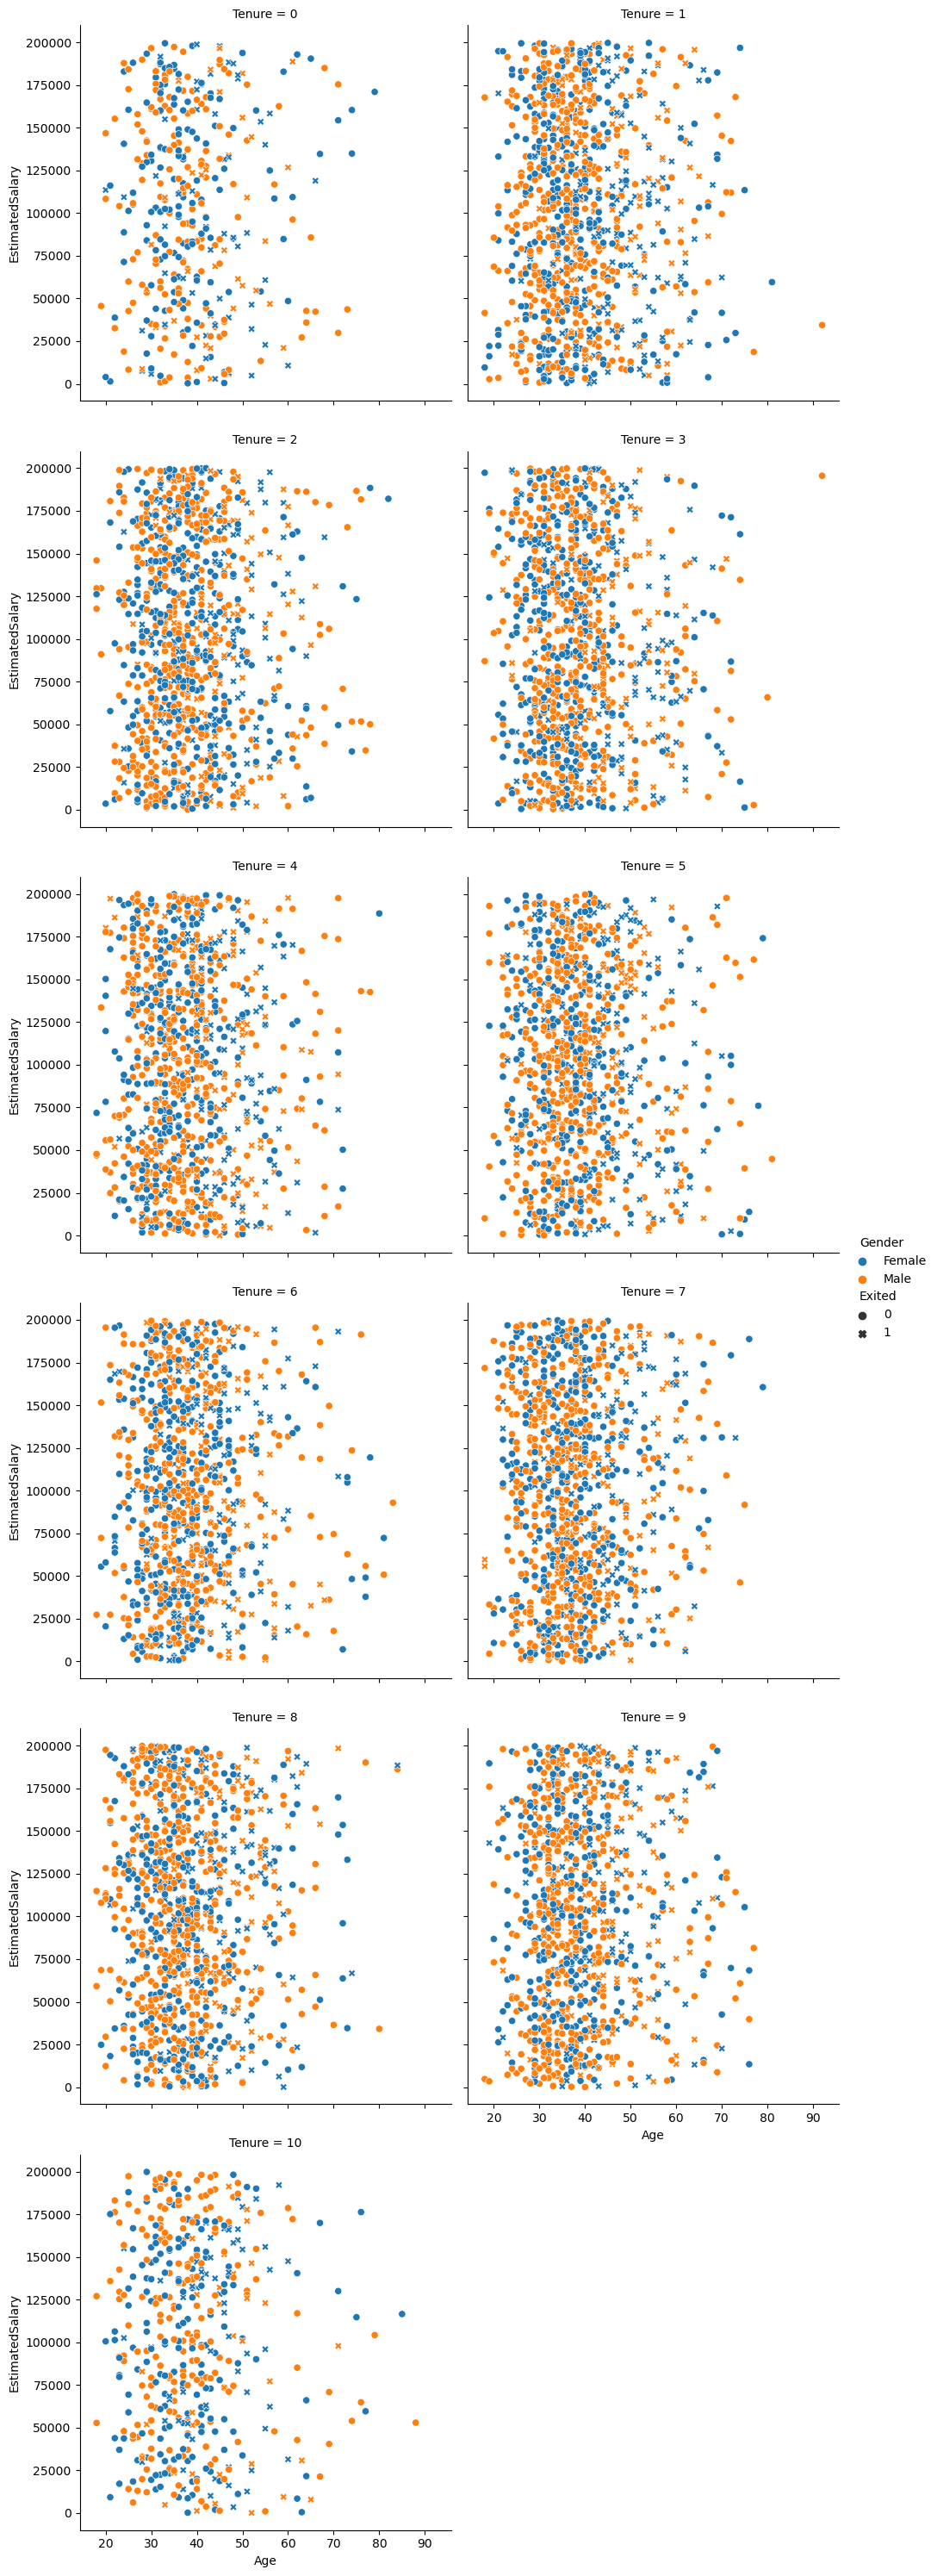

In [41]:
plt.figure(figsize=(10,5))
sns.relplot(y='EstimatedSalary',x="Age",data=df,hue="Gender",style="Exited",col="Tenure",col_wrap=2)
plt.show()

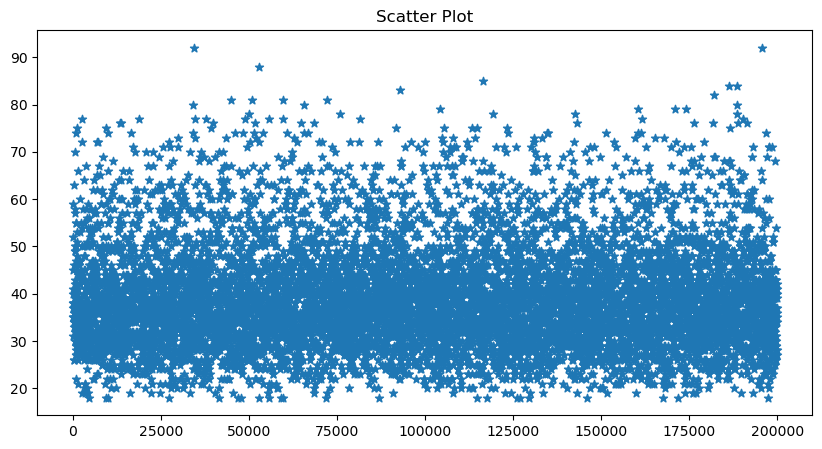

In [42]:
y=df["Age"]
x=df["EstimatedSalary"]
plt.figure(figsize=(10,5))
plt.scatter(x,y,marker="*")
plt.title("Scatter Plot")
plt.show()

##### Joint Plot
- It is used to visualize univariate and bivariate data. 
- It is used for visualizing linear regression models and fitting in.

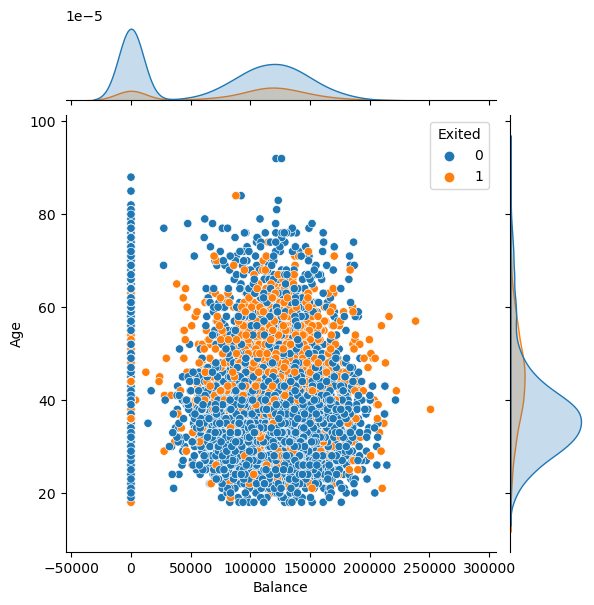

In [43]:
sns.jointplot(y="Age",x="Balance",hue="Exited",data=df)
plt.show()

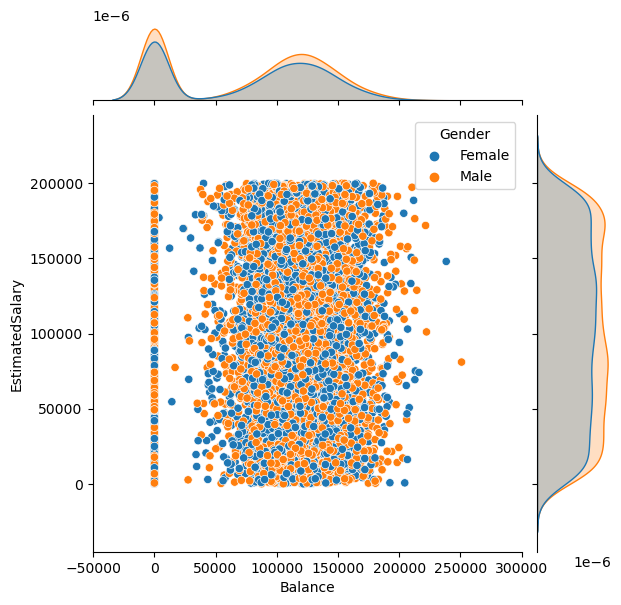

In [44]:
sns.jointplot(y="EstimatedSalary",x="Balance",hue="Gender",data=df)
plt.show()

##### Pair Plot
- Pairplot allows us to plot pairwise relationships between variables within a dataset. 
- This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

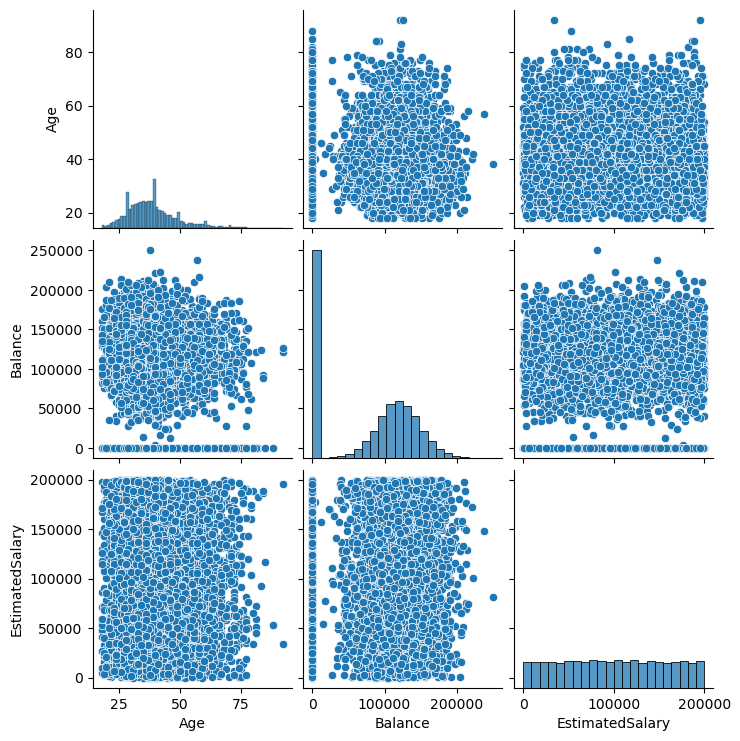

In [45]:
sns.pairplot(df,vars=continuous)
plt.show()

##### Heat Map
- Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

In [46]:
cor=df.corr(numeric_only=True)

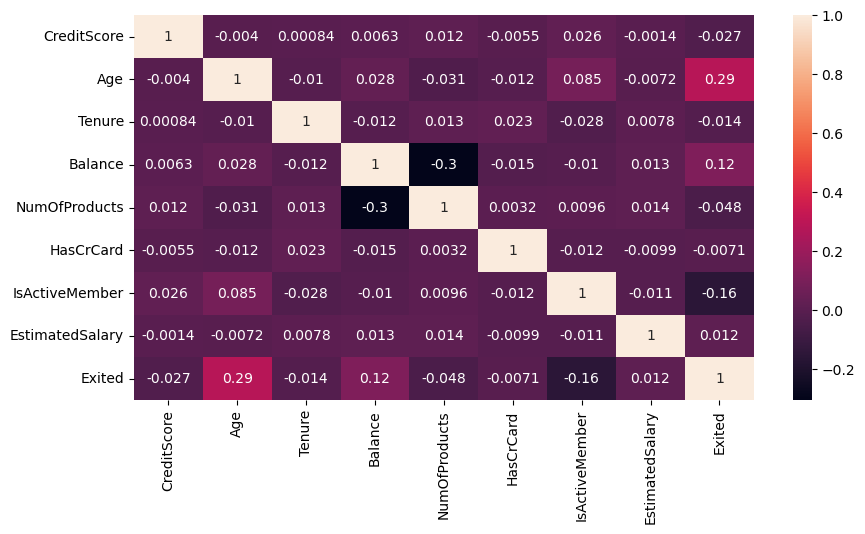

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)
plt.show()

In [48]:
cor_matrix=df[["EstimatedSalary","Balance"]].corr()
cor_matrix

EstimatedSalary   Balance
EstimatedSalary         1.000000  0.012797
Balance                 0.012797  1.000000

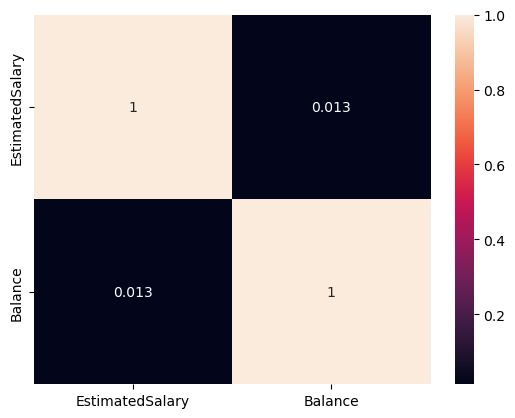

In [49]:
sns.heatmap(cor_matrix,annot=True)
plt.show()

In [50]:
cor_matrix1=df[["EstimatedSalary","Age"]].corr()
cor_matrix1

EstimatedSalary       Age
EstimatedSalary         1.000000 -0.007201
Age                    -0.007201  1.000000

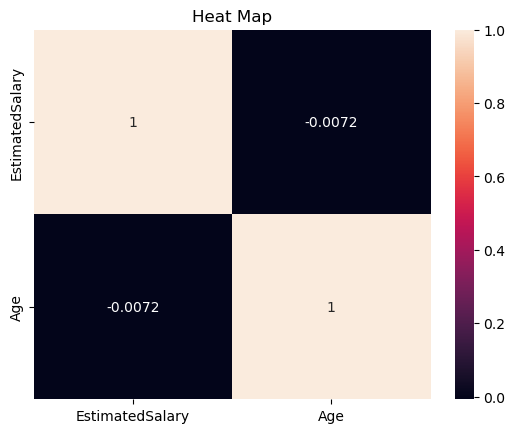

In [51]:
sns.heatmap(cor_matrix1,annot=True)
plt.title("Heat Map")
plt.show()

### Plots for Discrete Data
##### Univariate
- Pie Plot
- Bar Plot
- Count Plot
##### Bivariate
- Box Plot

##### Count Plot
- The Count plot Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

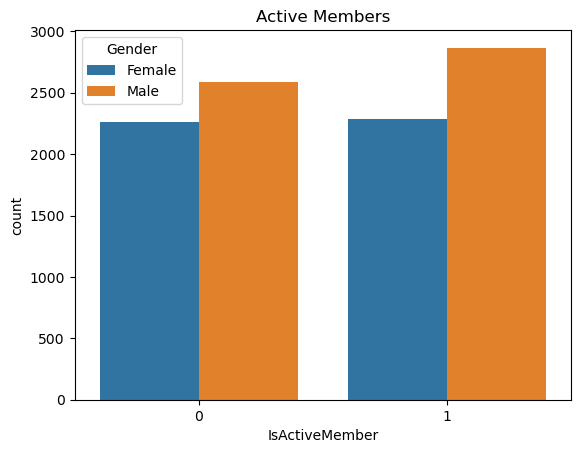

In [52]:
sns.countplot(x="IsActiveMember",hue="Gender",data=df)
plt.title('Active Members')
plt.show()

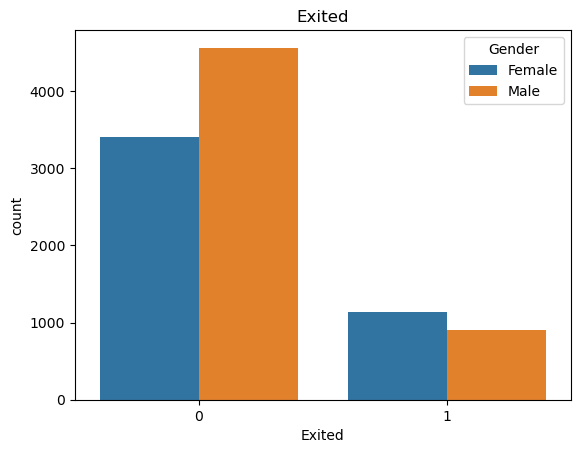

In [53]:
sns.countplot(x="Exited",hue="Gender",data=df)
plt.title('Exited')
plt.show()

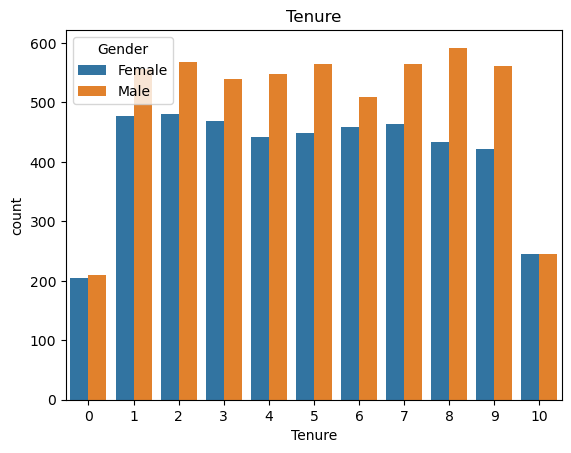

In [54]:
sns.countplot(x="Tenure",hue="Gender",data=df)
plt.title('Tenure')
plt.show()

##### Bar Plot
- Bar plot is a simple plot which we can use to plot categorical variable on the x-axis and numerical variable on y-axis and explore the relationship between both variables. 
- The blacktip on top of each bar shows the confidence Interval.

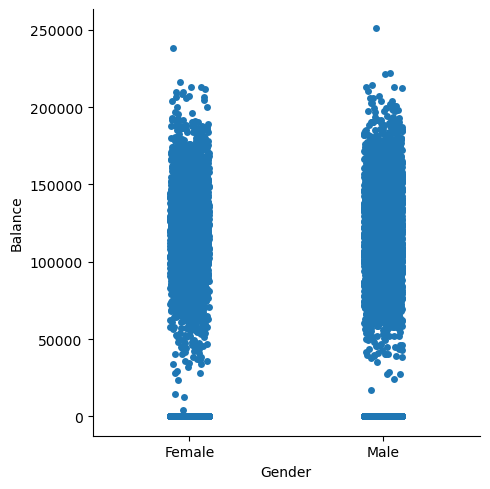

In [55]:
sns.catplot(x="Gender",y="Balance",data=df)
plt.show()

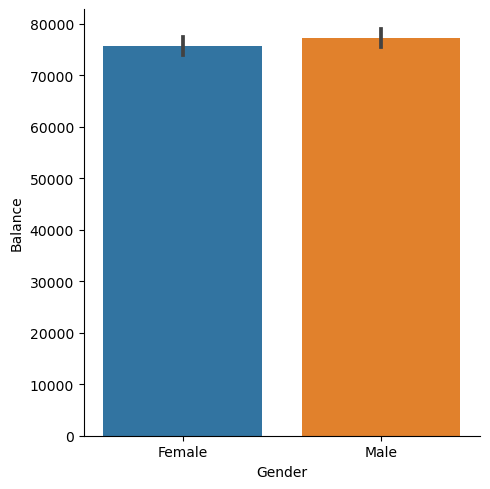

In [56]:
sns.catplot(x="Gender",y="Balance",data=df,kind="bar")
plt.show()

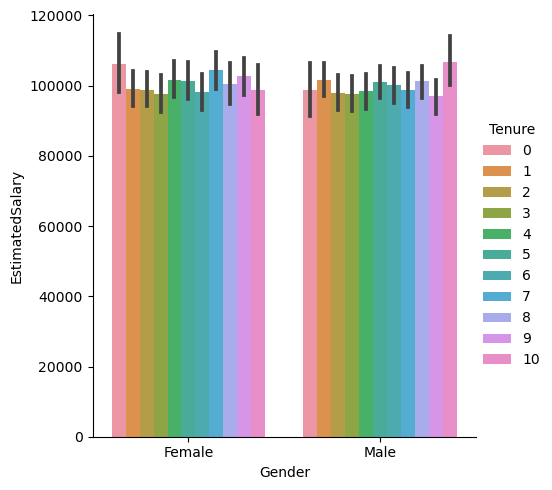

In [57]:
sns.catplot(x="Gender",y="EstimatedSalary",data=df,kind="bar",hue="Tenure")
plt.show()

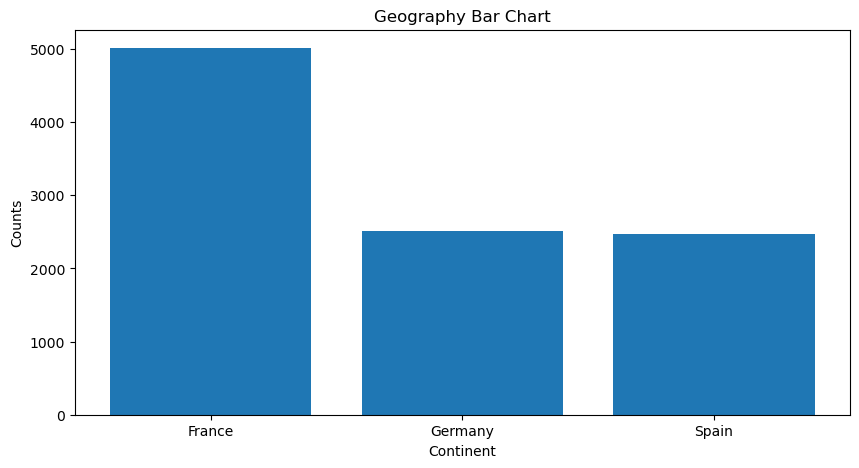

In [58]:

count=df["Geography"].value_counts().to_list()
geography=df["Geography"].value_counts().keys()
BarPlot=pd.DataFrame(zip(geography,count),columns=["Geography","Count"])
plt.figure(figsize=(10,5))
plt.title("Geography Bar Chart")
plt.xlabel("Continent")
plt.ylabel("Counts")
plt.bar("Geography","Count",data=BarPlot)
plt.show()

In [59]:
count=df["Geography"].value_counts().to_list()
geography=df["Geography"].value_counts().keys()
BarPlot=pd.DataFrame(zip(geography,count),columns=["Count","Geography"])
BarPlot

Count  Geography
0   France       5014
1  Germany       2509
2    Spain       2477

<function matplotlib.pyplot.show(close=None, block=None)>

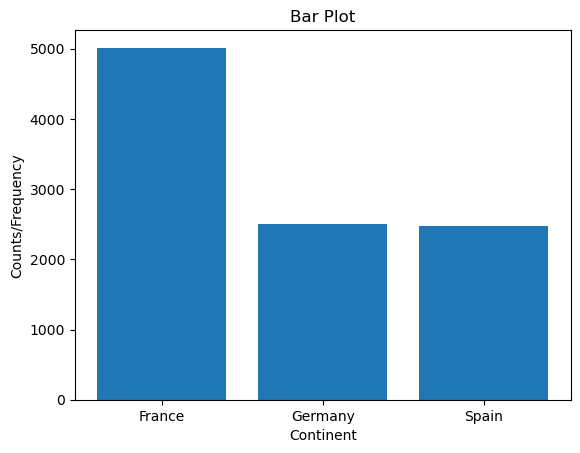

In [60]:
plt.bar("Count","Geography",data=BarPlot)
plt.title("Bar Plot")
plt.xlabel("Continent")
plt.ylabel("Counts/Frequency")
plt.show

##### Box Plot
- Boxplot show distributional information for data. 
- Typically the box represents the IQR (interquartile range), the center line represents the median, and the whiskers represent some extreme of the data.

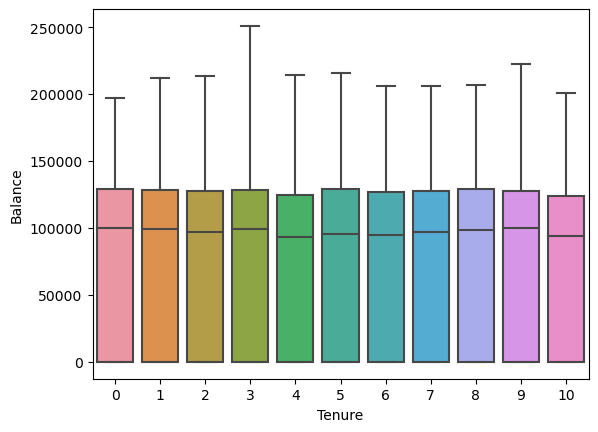

In [61]:
sns.boxplot(x="Tenure",y="Balance",data=df)
plt.show()

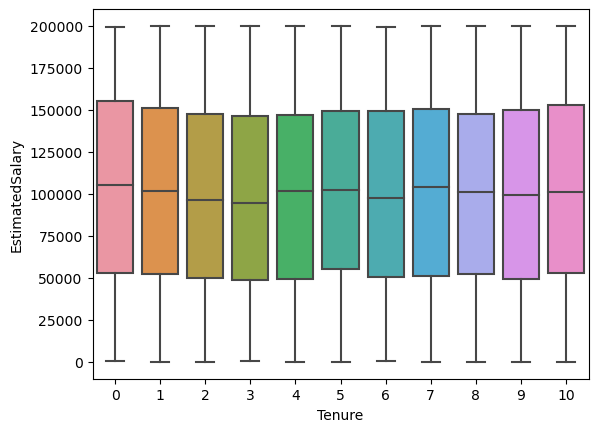

In [62]:
sns.boxplot(x="Tenure",y="EstimatedSalary",data=df)
plt.show()

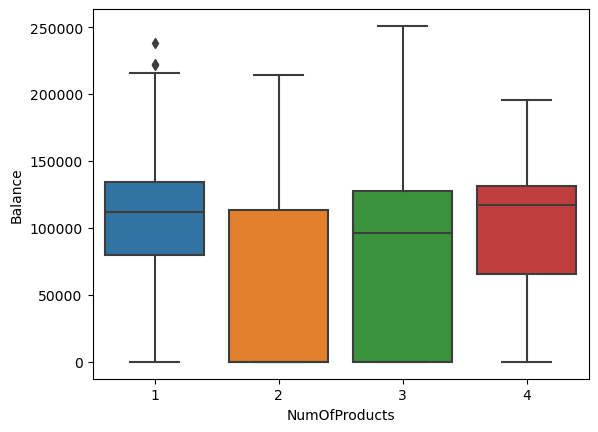

In [63]:
sns.boxplot(x="NumOfProducts",y="Balance",data=df)
plt.show()

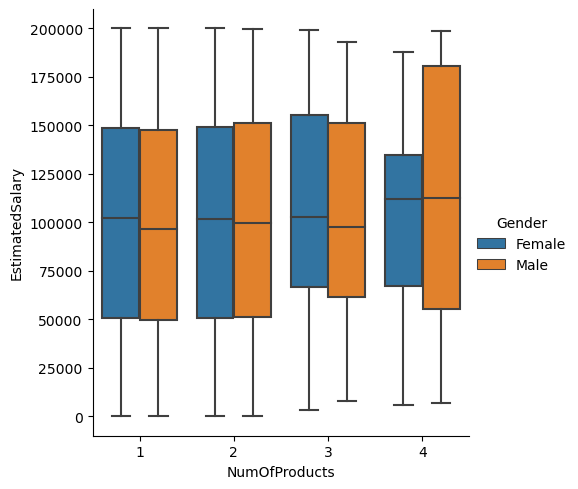

In [64]:
sns.catplot(x="NumOfProducts",y="EstimatedSalary",hue="Gender",data=df,kind='box')
plt.show()

##### Pie Plot
- Pie charts used to show proportions or percentages of different categories.

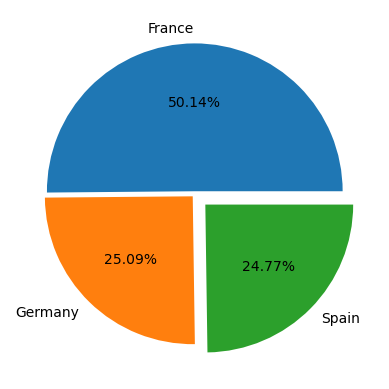

In [65]:
geography=df["Geography"].value_counts().values
count=df["Geography"].value_counts().keys()
geography
count
plt.pie(x=geography,labels=count,autopct="%0.2f%%",shadow=False,startangle=False,explode=[0.02,0.02,0.1])
plt.show()

##### Conclusion on EDA
- In the dataset we drop the 'RowNumber','CustomerId' and 'Surname' , because there is no impact on the dataset with this three columns.
- From the dataset we find Mean,Median,Max,Min,Standard Deviation, Count, Percentile etc..
- From the dataset we describe the data and find the nulls and outliers.
- In the dataset don't have any nulls and outliers. 
- By using Histogram we get the Frequency of the Continuous data.
- By using Boxplot we find the Whisker , Median , 25 percentile and 75 Percentile of each Continuous variable.
- With the Scatter Plot we find the distribution of each datapoints with different variables.
- With the Joint plot we draw a plot of two variables with bivariate and univariate graphs.
- With the Pair plot we find the pairwise relationships in a dataset.
- With this visualization we findout the distribution of data, relationship between the variables. 

#### Encoding Categorical Data 
- Encoding is used to convert the categorical data into the binary data and drop the first column from the obtained data.
- Without encoding the categorical data we can't use Machine learning algorithms

In [66]:
df=pd.get_dummies(df,drop_first=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

In [67]:
X=df.drop(columns=["Exited"])
y=df["Exited"]
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1        101348.88              False            False   
1               1        112542.58              False             True   
2               0        113931.57              False            False   
3               0         93826.63              False            False   
4               1         79084.10              False             True   

   Gender_Male  
0        False  
1        False  
2        False  
3        False  
4        False

#### Splitting the dataset for Train and Test
- Training data is used to train the machine-learning model. 
- The more training data the model has, the better it can make predictions. 
- Testing Data is used to evaluate the performance of the model.
- The model can learn from the training data and improve its predictions.
- sklearn is one of the Machine Learning library which is used to split the Train and Test data with the Ratio of (70:30),(80:20),(75,25) by using train_test_split module/function

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train.head()

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
803           511   29       9      0.0              2          0   
1387          725   66       4  86459.8              1          1   
921           609   61       1      0.0              1          1   
5917          674   31       1      0.0              1          1   
9610          455   40       1      0.0              3          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
803                1        140676.98              False             True   
1387               1        141476.56              False            False   
921                0         22447.85              False             True   
5917               0        128954.05              False            False   
9610               1        129975.34              False            False   

      Gender_Male  
803         False  
1387         True  
921          True  
5917        False  
9610         True

In [69]:
y_train.head()

803     0
1387    0
921     1
5917    0
9610    0
Name: Exited, dtype: int64

In [70]:
X_test.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6676          619   52       8       0.00              2          1   
6421          616   23       8   73112.95              1          1   
9834          516   46       6   62212.29              1          0   
8492          494   28       9  114731.76              2          0   
9982          655   46       7  137145.12              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
6676               1        123242.11              False             True   
6421               1         62733.05              False            False   
9834               1        171681.86              False            False   
8492               1         79479.74              False            False   
9982               0        115146.40               True            False   

      Gender_Male  
6676         True  
6421         True  
9834        False  
8492         True  
9982        False

In [71]:
y_test.head()

6676    0
6421    0
9834    1
8492    0
9982    1
Name: Exited, dtype: int64

#### Feature Scaling
- Feature scaling is a method used to normalize the range of independent variables or features of data. 
- In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- Feature scaling, also known as data normalization or standardization, is a preprocessing step in machine learning that involves transforming the input features to a similar scale.
- This is important because many machine learning algorithms are sensitive to the scale of input features.

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Logistic Regression Modelling
- Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.
- The model delivers a binary outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

##### Advantages 
- Easier to implement machine learning methods
- Suitable for linearly separable datasets
- Provides valuable insights

source: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/#:~:text=Practices%20for%202022-,What%20Is%20Logistic%20Regression%3F,1%2C%20or%20true%2Ffalse.

In [73]:
from sklearn.linear_model import LogisticRegression
M1=LogisticRegression()
M1.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [74]:
y_p_train1=M1.predict(X_train)
y_p_test1=M1.predict(X_test)

### Evaluation

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_p_train1))
print(accuracy_score(y_test,y_p_test1))

0.8135714285714286
0.805


#### Cross Validation

[0.7915 0.7925 0.7935 0.791  0.7855]
0.7908
[[2293   85]
 [ 500  122]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2378
           1       0.59      0.20      0.29       622

    accuracy                           0.81      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.77      0.81      0.76      3000



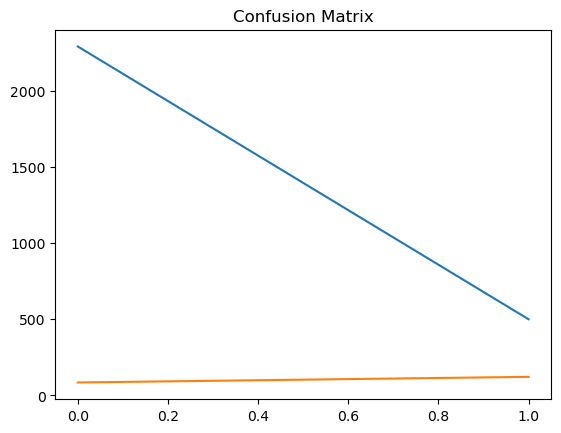

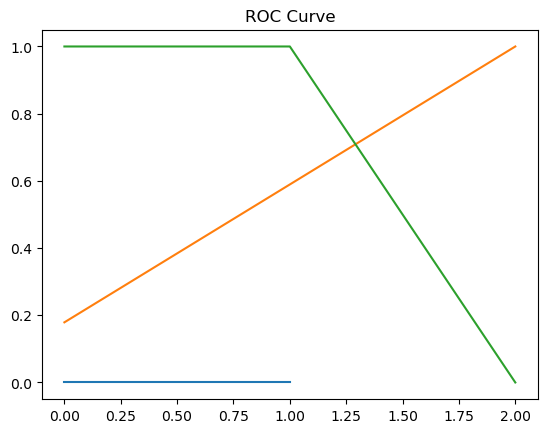

In [76]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(M1,X,y,cv=5)
print(scores)
print(scores.mean())
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_p_test1))
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_test1))
plt.plot(confusion_matrix(y_test,y_p_test1))
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import roc_curve
plt.plot(roc_curve(y_p_test1,y_test))
plt.title("ROC Curve")
plt.show()

### Support Vector Machine (SVM)
- A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. 
- SVMs are widely adopted across disciplines such as healthcare, natural language processing, signal processing applications, and speech & image recognition fields.


##### Support Vector Machine (SVM) Modeling with default parameters

In [77]:
#Modelling
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
M2=SVC()
M2.fit(X_train,y_train)
#Prediction
y_p_train2=M2.predict(X_train)
y_p_test2=M2.predict(X_test)
## Accuracy
print(accuracy_score(y_train,y_p_train2))
print(accuracy_score(y_test,y_p_test2))
## Cross Validation Score
scores=cross_val_score(M2,X,y,cv=5)
print(scores)
print(scores.mean())

0.8638571428571429
0.857
[0.796  0.796  0.7965 0.7965 0.7965]
0.7963


##### HyperParameter Tuning
- A hyperparameter is a machine learning parameter whose value is chosen before a learning algorithm is trained. 
- Hyperparameters should not be confused with parameters. In machine learning, the label parameter is used to identify variables whose values are learned during training.

In [78]:
from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={"C":[0.01,0.1,1,10]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1}

##### Rebuilding the SVM with best parameters

In [79]:
M2=SVC(C=1,kernel='poly')
M2.fit(X_train,y_train)
#Prediction
y_p_train2=M2.predict(X_train)
y_p_test2=M2.predict(X_test)
## Accuracy
print(accuracy_score(y_train,y_p_train2))
print(accuracy_score(y_test,y_p_test2))

0.8594285714285714
0.8516666666666667


### K-Nearest Neighbors (KNN)
- K-NN algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. 
- It does not require any assumptions about the underlying data distribution. - It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks.
- It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset. 
- K-NN is less sensitive to outliers compared to other algorithms.

##### KNN (K-Nearest Neighbor)  Modeling with default parameters

In [80]:
from sklearn.neighbors import KNeighborsClassifier
M3=KNeighborsClassifier()
M3.fit(X_train,y_train)
## Prediction
y_p_train3=M3.predict(X_train)
y_p_test3=M3.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train3))
print(accuracy_score(y_test,y_p_test3))
## Cross Validation Score 
scores=cross_val_score(M3,X_train,y_train,cv=5)
print(scores)
print(scores.mean())

0.8734285714285714
0.8276666666666667
[0.80857143 0.825      0.81928571 0.82142857 0.83      ]
0.8208571428571428


##### Choosing best K-value

In [81]:
test_acc=[]
for k in range(1,30,2):
    M3=KNeighborsClassifier(n_neighbors=k)
    M3.fit(X_train,y_train)
    y_pred_test=M3.predict(X_test)
    test_acc_score=accuracy_score(y_test,y_pred_test)
    test_acc.append(test_acc_score)
test_acc

[0.7873333333333333,
 0.8206666666666667,
 0.8276666666666667,
 0.8313333333333334,
 0.8383333333333334,
 0.8396666666666667,
 0.835,
 0.833,
 0.8313333333333334,
 0.8293333333333334,
 0.8306666666666667,
 0.829,
 0.8266666666666667,
 0.826,
 0.8286666666666667]

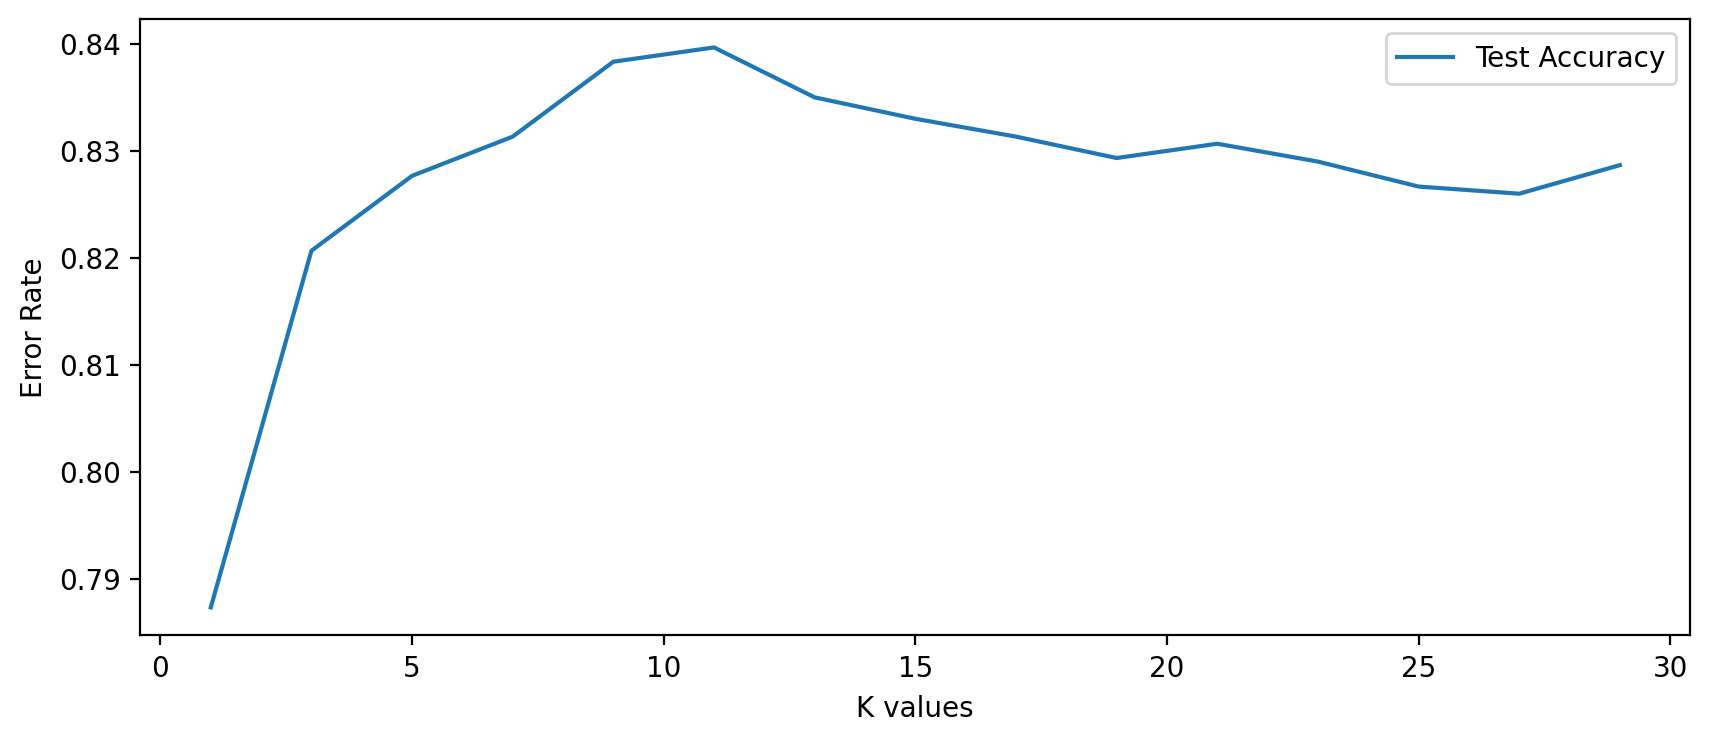

In [82]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,30,2),test_acc,label="Test Accuracy")
plt.ylabel("Error Rate")
plt.xlabel("K values")
plt.legend()
plt.show()

##### HyperParameter Tuning for KNN Classifier

In [83]:
#from sklearn.model_selection import GridSearchCV
#estimator=KNeighborsClassifier() # {'n_neighbors': 15, 'p': 2}
#param_grid={'n_neighbors':list(range(1,31)),"p":[1,2]}
#grid1=GridSearchCV(estimator,param_grid,cv=5)
#grid1.fit(X_train,y_train)
#grid1.best_params_

##### Rebuilt KNN model with best parameters

0.844
0.833
[[2309   69]
 [ 432  190]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2378
           1       0.73      0.31      0.43       622

    accuracy                           0.83      3000
   macro avg       0.79      0.64      0.67      3000
weighted avg       0.82      0.83      0.80      3000



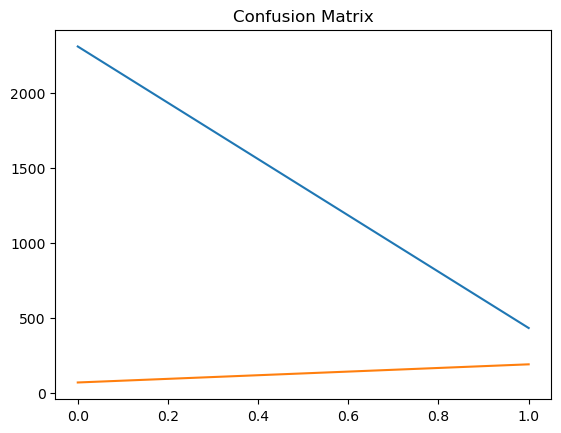

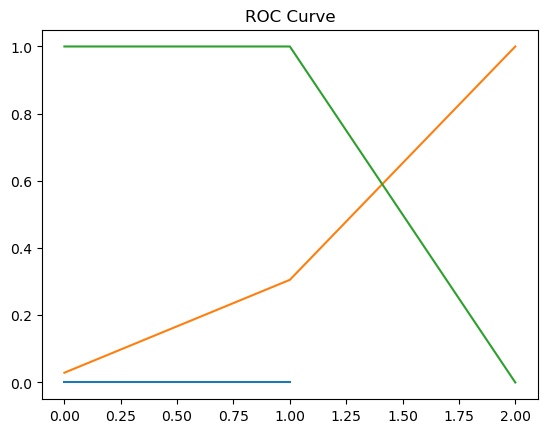

In [84]:
from sklearn.neighbors import KNeighborsClassifier
M3=KNeighborsClassifier(n_neighbors=15,p=2)
M3.fit(X_train,y_train)
## Prediction
y_p_train3=M3.predict(X_train)
y_p_test3=M3.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train3))
print(accuracy_score(y_test,y_p_test3))
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_p_test3))
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_test3))
### plots of Confusion Matrix and ROC Curve
plt.plot(confusion_matrix(y_test,y_p_test3),data=M3)
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import roc_curve
plt.plot(roc_curve(y_test,y_p_test3),data=M3)
plt.title("ROC Curve")
plt.show()


### Decision Tree
- A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.
- It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

##### Decision Tree Classifier Modeling with default parameter

In [85]:
from sklearn.tree import DecisionTreeClassifier
M4=DecisionTreeClassifier(random_state=101)
M4.fit(X_train,y_train)
### Prediction
y_p_train4=M4.predict(X_train)
y_p_test4=M4.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train4))
print(accuracy_score(y_test,y_p_test4))
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_p_test4))
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_test4))
## Cross Validation Score 
scores=cross_val_score(M4,X_train,y_train,cv=5)
print(scores)
print(scores.mean())

1.0
0.7976666666666666
[[2060  318]
 [ 289  333]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2378
           1       0.51      0.54      0.52       622

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000

[0.8        0.78714286 0.78642857 0.79214286 0.805     ]
0.7941428571428573


##### Decision Tree Classifier Modeling with Optimization

0.8411428571428572
0.8416666666666667


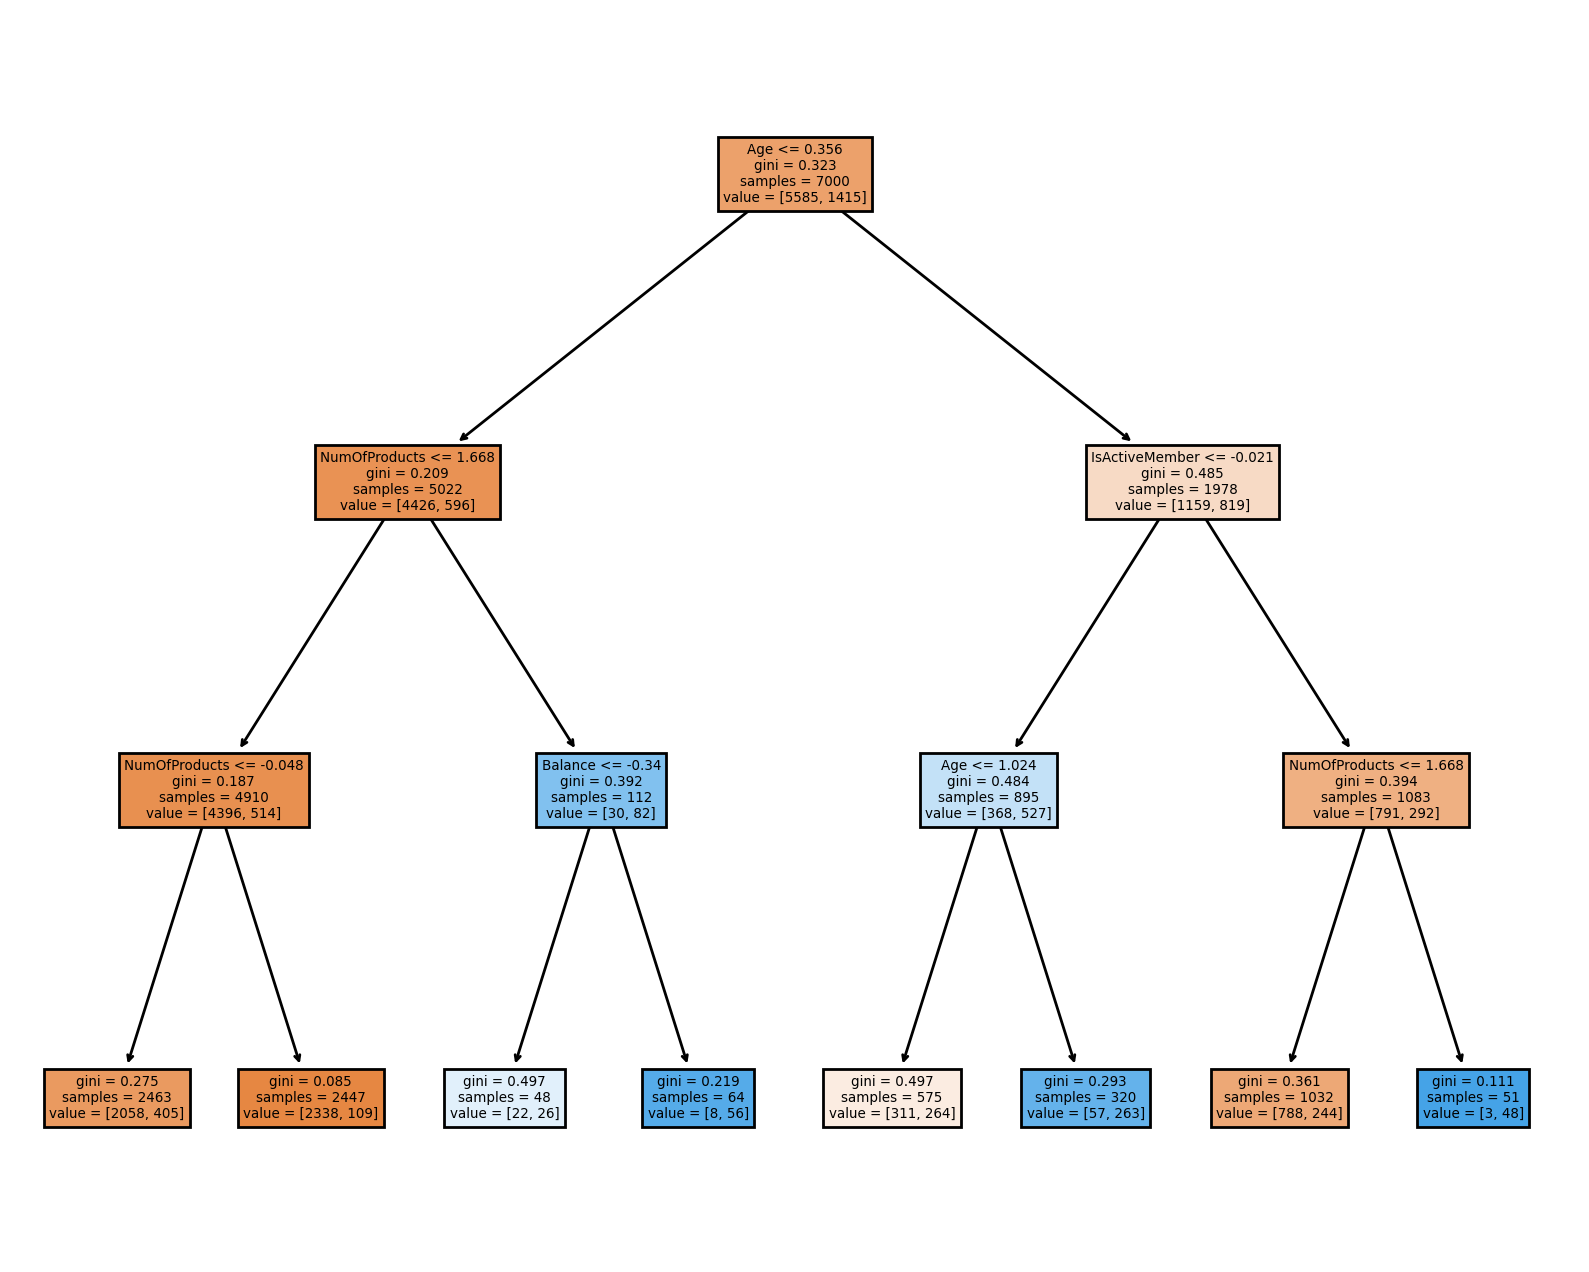

0.8411428571428572
0.8416666666666667


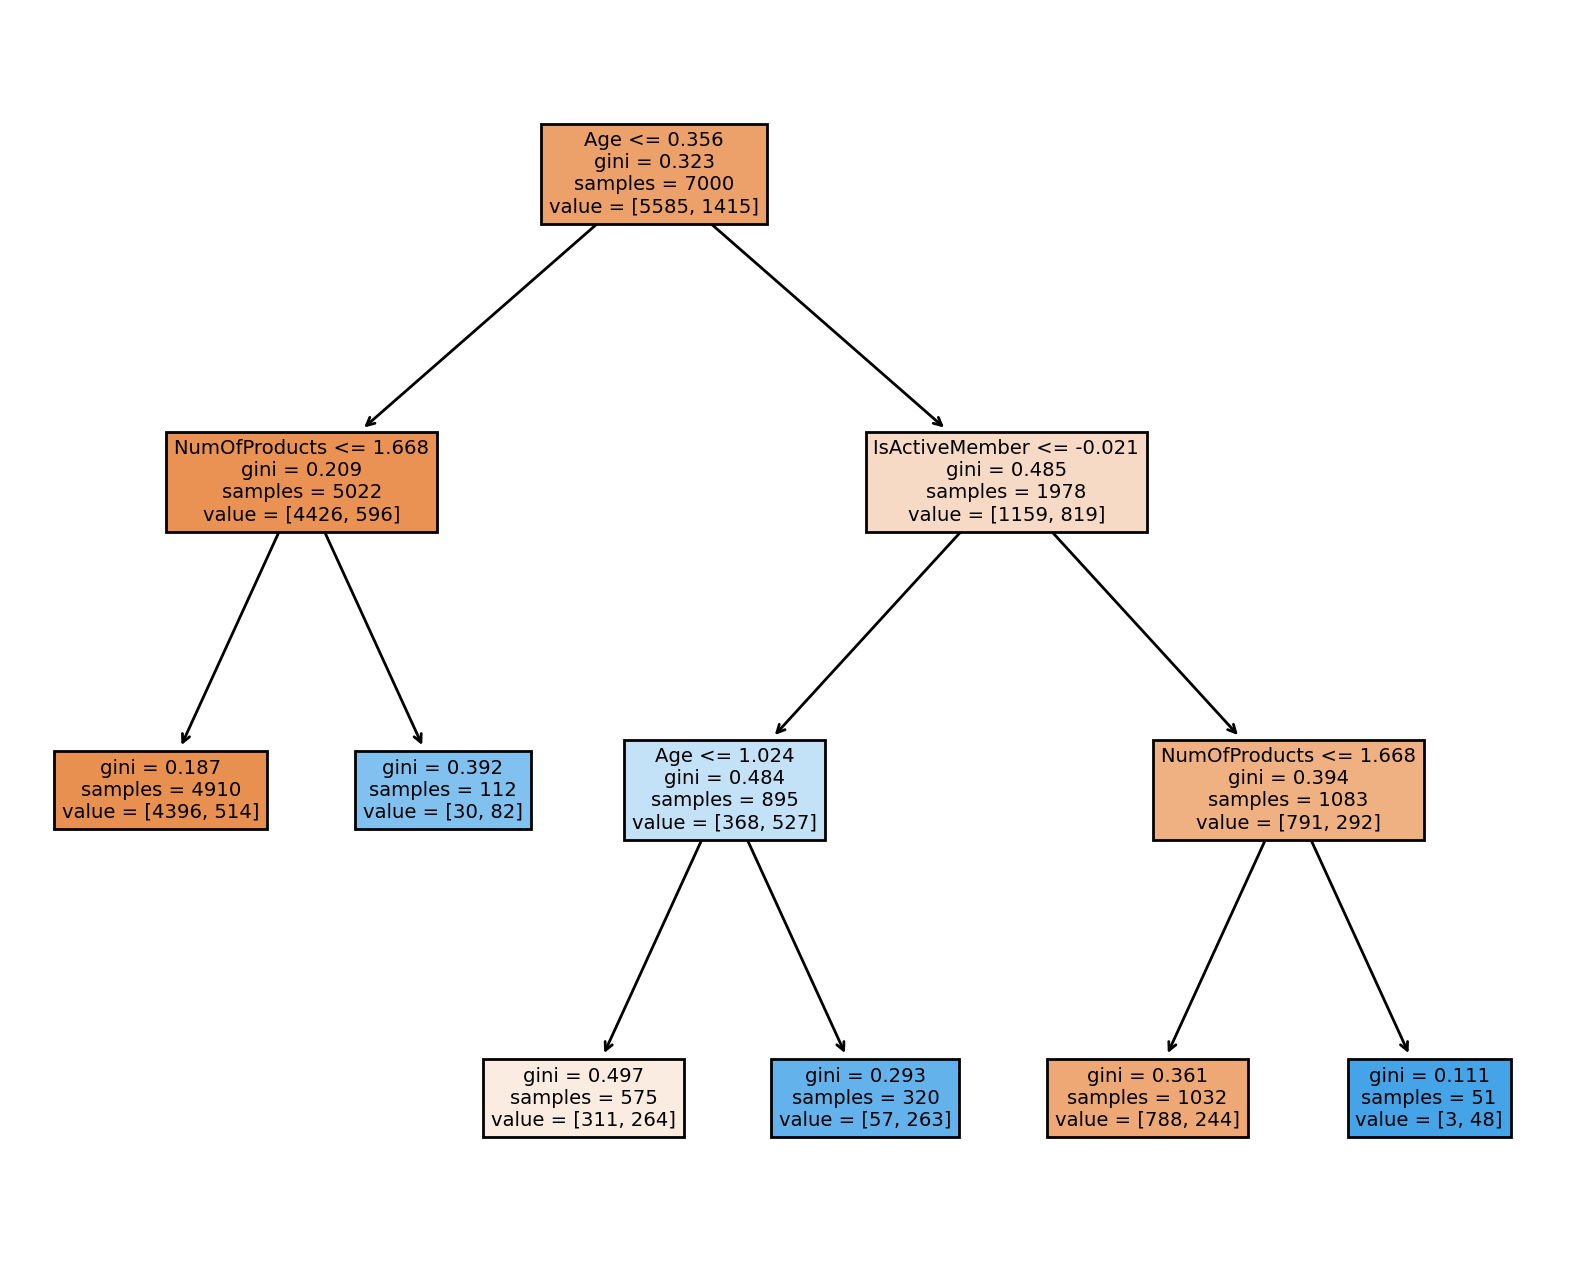

In [86]:
### Importance of eachbfeature given by this model
M4.feature_importances_
pd.DataFrame(index=X.columns,data=M4.feature_importances_,columns=["Feature Importance"])
### Visualize the Tree
from sklearn.tree import plot_tree
def report_model(M4):
    M4.fit(X_train,y_train)
    y_p_train4=M4.predict(X_train)
    y_p_test4=M4.predict(X_test)
    print(accuracy_score(y_train,y_p_train4))
    print(accuracy_score(y_test,y_p_test4))
    plt.figure(figsize=(10,8),dpi=200,clear=True)
    plot_tree(M4,filled=True,feature_names=X.columns)
    plt.show()
## Optimization --> Pruning of Decision Tree
purned_tree= DecisionTreeClassifier(max_depth=3)
report_model(purned_tree)
## Max Leaf Nodes
purned_tree= DecisionTreeClassifier(max_leaf_nodes=6)
report_model(purned_tree)

### Random Forest
- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. 
- It can be used for both Classification and Regression problems in ML.
- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

##### Random Forest with default parameters

1.0
0.8666666666666667
[[2296   82]
 [ 318  304]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.79      0.49      0.60       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000

[0.86       0.85785714 0.86142857 0.85428571 0.85142857]
0.857


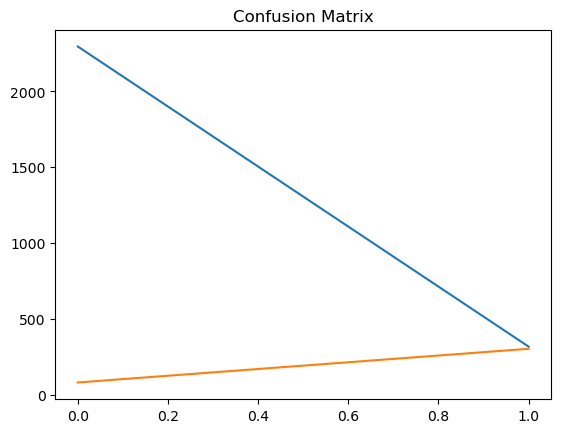

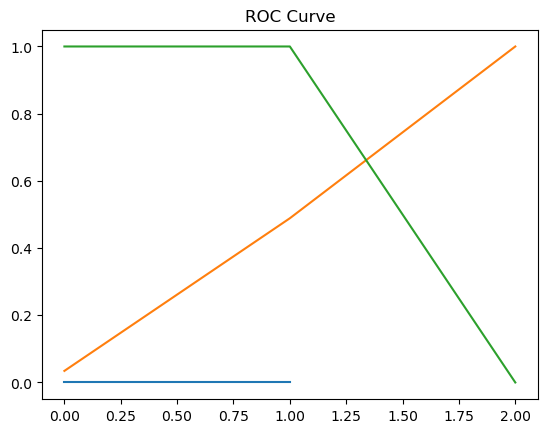

[0.14659753 0.23488136 0.08214778 0.14527284 0.12968647 0.0178683
 0.03761367 0.14671788 0.02620096 0.01275036 0.02026284]


Feature Importance
CreditScore                  0.146598
Age                          0.234881
Tenure                       0.082148
Balance                      0.145273
NumOfProducts                0.129686
HasCrCard                    0.017868
IsActiveMember               0.037614
EstimatedSalary              0.146718
Geography_Germany            0.026201
Geography_Spain              0.012750
Gender_Male                  0.020263

In [87]:
from sklearn.ensemble import RandomForestClassifier
M5=RandomForestClassifier()
M5.fit(X_train,y_train)
### Prediction
y_p_train5=M5.predict(X_train)
y_p_test5=M5.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train5))
print(accuracy_score(y_test,y_p_test5))
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_p_test5))
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_test5))
## Cross Validation Score 
scores=cross_val_score(M5,X_train,y_train,cv=5)
print(scores)
print(scores.mean())
## Ploting Graphs
plt.plot(confusion_matrix(y_test,y_p_test5))
plt.title("Confusion Matrix")
plt.show()
plt.plot(roc_curve(y_test,y_p_test5))
plt.title("ROC Curve")
plt.show()
### importance of each feature given by this model
print(M5.feature_importances_)
pd.DataFrame(index=X.columns,data=M5.feature_importances_,columns=["Feature Importance"])

#### HyperParameter Tuning

In [88]:
#from sklearn.model_selection import GridSearchCV
#estimator=RandomForestClassifier() #{n_estimators:53}
#param_grid= {'n_estimators':list(range(1,101,2))}
#grid=GridSearchCV(estimator,param_grid,scoring="accuracy")
#grid.fit(X_train,y_train)
#grid.best_params_'''

##### Final Model with best Parameters

0.9997142857142857
0.864
[[2288   90]
 [ 318  304]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.77      0.49      0.60       622

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.86      0.85      3000

[0.85       0.85571429 0.85785714 0.855      0.85642857]
0.8550000000000001


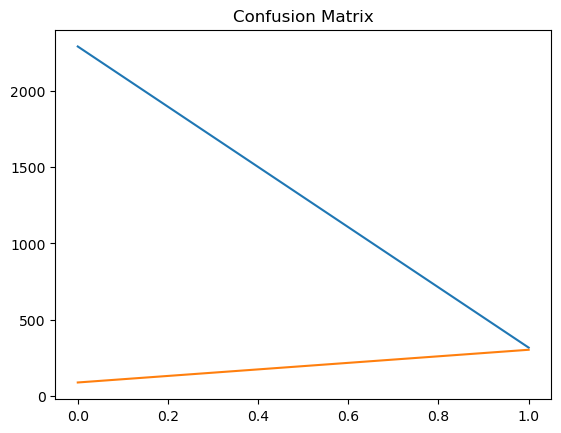

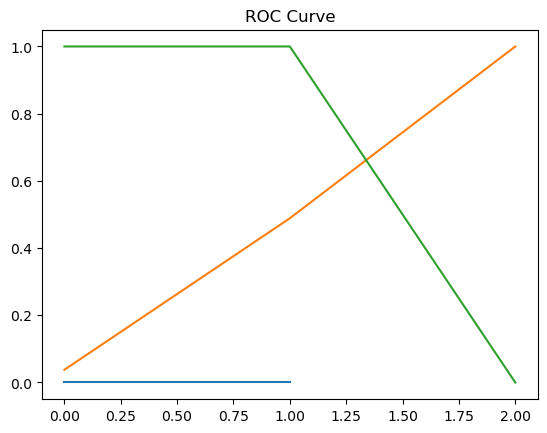

[0.14602583 0.23081546 0.0829496  0.14219843 0.13348351 0.0184228
 0.0377656  0.14695508 0.02707976 0.01433463 0.01996929]


Feature Importance
CreditScore                  0.146026
Age                          0.230815
Tenure                       0.082950
Balance                      0.142198
NumOfProducts                0.133484
HasCrCard                    0.018423
IsActiveMember               0.037766
EstimatedSalary              0.146955
Geography_Germany            0.027080
Geography_Spain              0.014335
Gender_Male                  0.019969

In [89]:
from sklearn.ensemble import RandomForestClassifier
M5=RandomForestClassifier(n_estimators=53)
M5.fit(X_train,y_train)
### Prediction
y_p_train5=M5.predict(X_train)
y_p_test5=M5.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train5))
print(accuracy_score(y_test,y_p_test5))
## Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_p_test5))
## Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_test5))
## Cross Validation Score 
scores=cross_val_score(M5,X_train,y_train,cv=5)
print(scores)
print(scores.mean())
## Ploting Graphs
plt.plot(confusion_matrix(y_test,y_p_test5))
plt.title("Confusion Matrix")
plt.show()
plt.plot(roc_curve(y_test,y_p_test5))
plt.title("ROC Curve")
plt.show()
### importance of each feature given by this model
print(M5.feature_importances_)
pd.DataFrame(index=X.columns,data=M5.feature_importances_,columns=["Feature Importance"])


### AdaBoosting
- AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks.
- It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner.

##### AdaBoost Calssifier with default parameters

0.8581428571428571
0.864


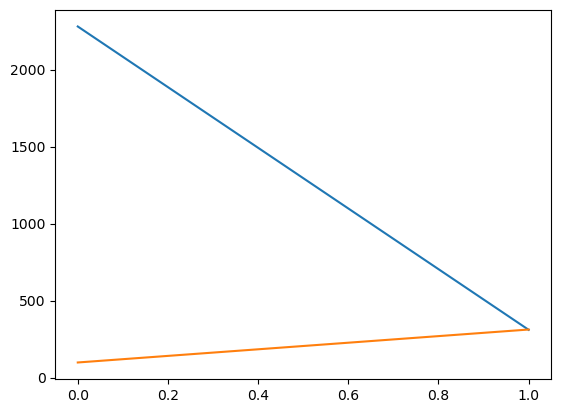

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.50      0.60       622

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.86      0.85      3000

[0.857  0.865  0.8545 0.8615 0.852 ] 0.858


In [90]:
## Modeling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
M6=AdaBoostClassifier()
M6.fit(X_train,y_train)
## Prediction 
y_p_train6=M6.predict(X_train)
y_p_test6=M6.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train6))
print(accuracy_score(y_test,y_p_test6))
## Confusion Matrix
plt.plot(confusion_matrix(y_test,y_p_test6))
plt.show()
## Classification report
print(classification_report(y_test,y_p_test6))
## Cross Validation Score
scores=cross_val_score(M6,X,y,cv=5)
print(scores,scores.mean())

##### HyperParameter Tuning

In [91]:
#from sklearn.model_selection import GridSearchCV
#estimator=AdaBoostClassifier()  # n_estimators=16
#param_grid={"n_estimators":list(range(1,100))}  
#grid=GridSearchCV(estimator,param_grid,cv=5)
#grid.fit(X_train,y_train)
#grid.best_params_

##### Final Model

In [92]:
## Modeling
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
M6=AdaBoostClassifier(n_estimators=16)
M6.fit(X_train,y_train)
## Prediction 
y_p_train6=M6.predict(X_train)
y_p_test6=M6.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train6))
print(accuracy_score(y_test,y_p_test6))

0.8548571428571429
0.8603333333333333


##### Feature Importance
- Feature importance refers to techniques that calculate a score for all the input features for a given model. 
- The scores represent the “importance” of each feature.
- A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

[0.0625 0.4375 0.     0.0625 0.25   0.     0.0625 0.     0.0625 0.
 0.0625]
                   Feature Importance
CreditScore                    0.0625
Age                            0.4375
Tenure                         0.0000
Balance                        0.0625
NumOfProducts                  0.2500
HasCrCard                      0.0000
IsActiveMember                 0.0625
EstimatedSalary                0.0000
Geography_Germany              0.0625
Geography_Spain                0.0000
Gender_Male                    0.0625
                   Feature Importance
Age                            0.4375
NumOfProducts                  0.2500
CreditScore                    0.0625
Balance                        0.0625
IsActiveMember                 0.0625
Geography_Germany              0.0625
Gender_Male                    0.0625


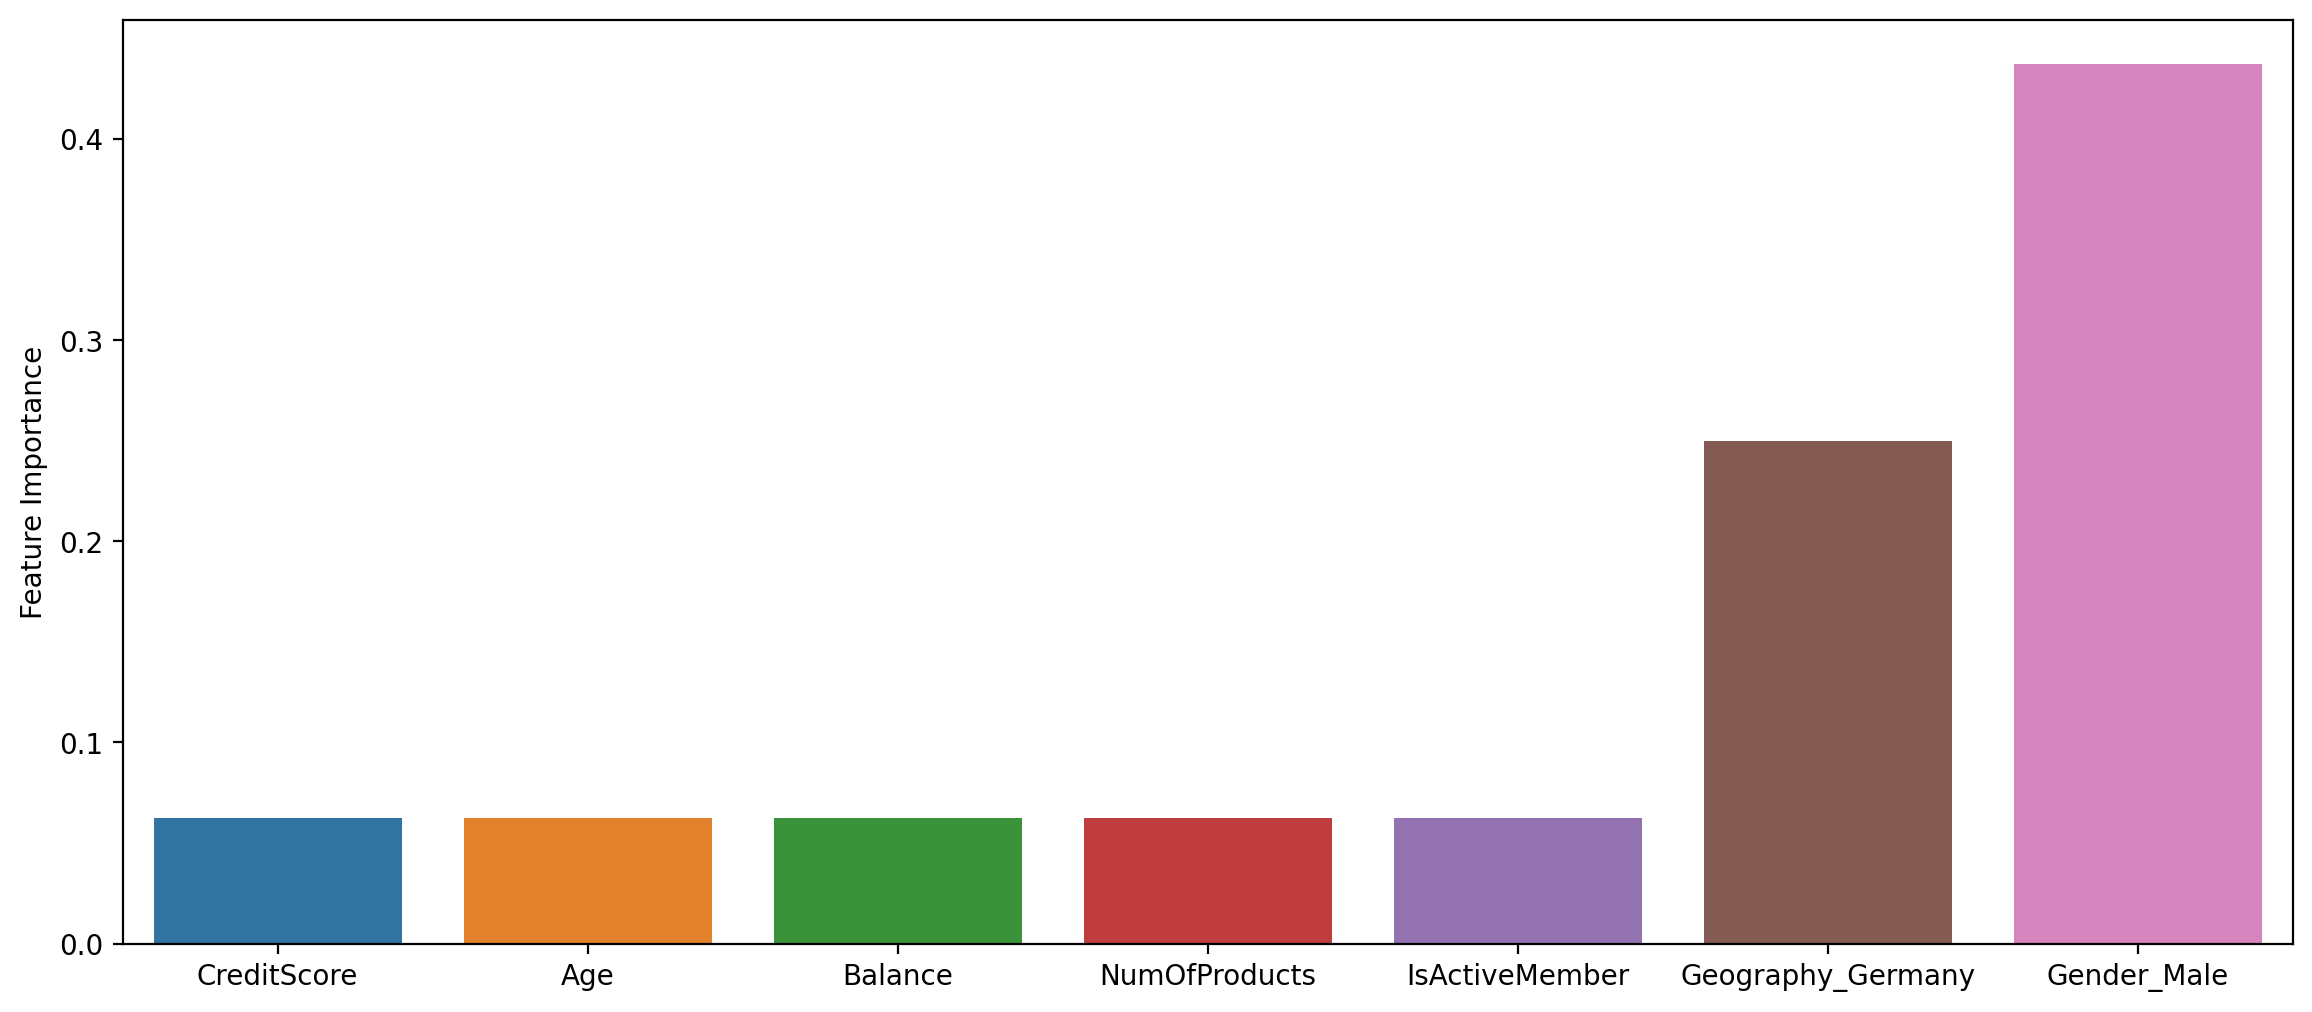

In [93]:
print(M6.feature_importances_)
i=pd.DataFrame(index=X.columns,data=M6.feature_importances_,columns=["Feature Importance"])
print(i)
i=i[i["Feature Importance"]>0.01]
print(i.sort_values("Feature Importance",ascending=False))
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=i.sort_values("Feature Importance"),x=i.index,y="Feature Importance")
plt.show()

### Gradient Boosting
- Gradient Boosting is a popular boosting algorithm in machine learning used for classification and regression tasks. 
- Boosting is one kind of ensemble Learning method which trains the model sequentially and each new model tries to correct the previous model. 
- It combines several weak learners into strong learners.

##### Gradient Boosting Classifier with default Parameters

In [94]:
## Modeling
from sklearn.ensemble import GradientBoostingClassifier
M7=GradientBoostingClassifier()
M7.fit(X_train,y_train)
## Prediction
y_p_train7=M7.predict(X_train)
y_p_test7=M7.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train7))
print(accuracy_score(y_test,y_p_test7))
## Confusion Matrix
print(confusion_matrix(y_test,y_p_test7))
## Classification Report
print(classification_report(y_test,y_p_test7))
# Cross Validation Score
scores=cross_val_score(M7,X,y,cv=5)
print(scores,scores.mean())

0.8711428571428571
0.867
[[2293   85]
 [ 314  308]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.78      0.50      0.61       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

[0.8645 0.872  0.857  0.8715 0.8585] 0.8647


##### HyperParameter Tuning

In [95]:
#from sklearn.model_selection import GridSearchCV
#estimator=GradientBoostingClassifier()  #{'learning_rate': 0.3, 'n_estimators': 20}
#param_grid={"n_estimators":[1,5,10,20,40,100],'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}  
#grid=GridSearchCV(estimator,param_grid,cv=5, scoring="accuracy")
#grid.fit(X_train,y_train)
#grid.best_params_

##### Final Model with best Parameters

In [96]:
## Modeling
from sklearn.ensemble import GradientBoostingClassifier
M7=GradientBoostingClassifier(n_estimators=20,learning_rate=0.3)
M7.fit(X_train,y_train)
## Prediction
y_p_train7=M7.predict(X_train)
y_p_test7=M7.predict(X_test)
## Evaluation/accuracy
print(accuracy_score(y_train,y_p_train7))
print(accuracy_score(y_test,y_p_test7))
# Cross Validation Score
scores=cross_val_score(M7,X,y,cv=5)
print(scores,scores.mean())

0.8687142857142857
0.8623333333333333
[0.8595 0.87   0.8605 0.872  0.8525] 0.8629


##### Feature Importance

[0.01641521 0.37974155 0.00499595 0.07695894 0.33226727 0.
 0.11396795 0.00714301 0.05467614 0.         0.01383399]
                   Feature Importance
CreditScore                  0.016415
Age                          0.379742
Tenure                       0.004996
Balance                      0.076959
NumOfProducts                0.332267
HasCrCard                    0.000000
IsActiveMember               0.113968
EstimatedSalary              0.007143
Geography_Germany            0.054676
Geography_Spain              0.000000
Gender_Male                  0.013834
                   Feature Importance
Age                          0.379742
NumOfProducts                0.332267
IsActiveMember               0.113968
Balance                      0.076959
Geography_Germany            0.054676
CreditScore                  0.016415
Gender_Male                  0.013834


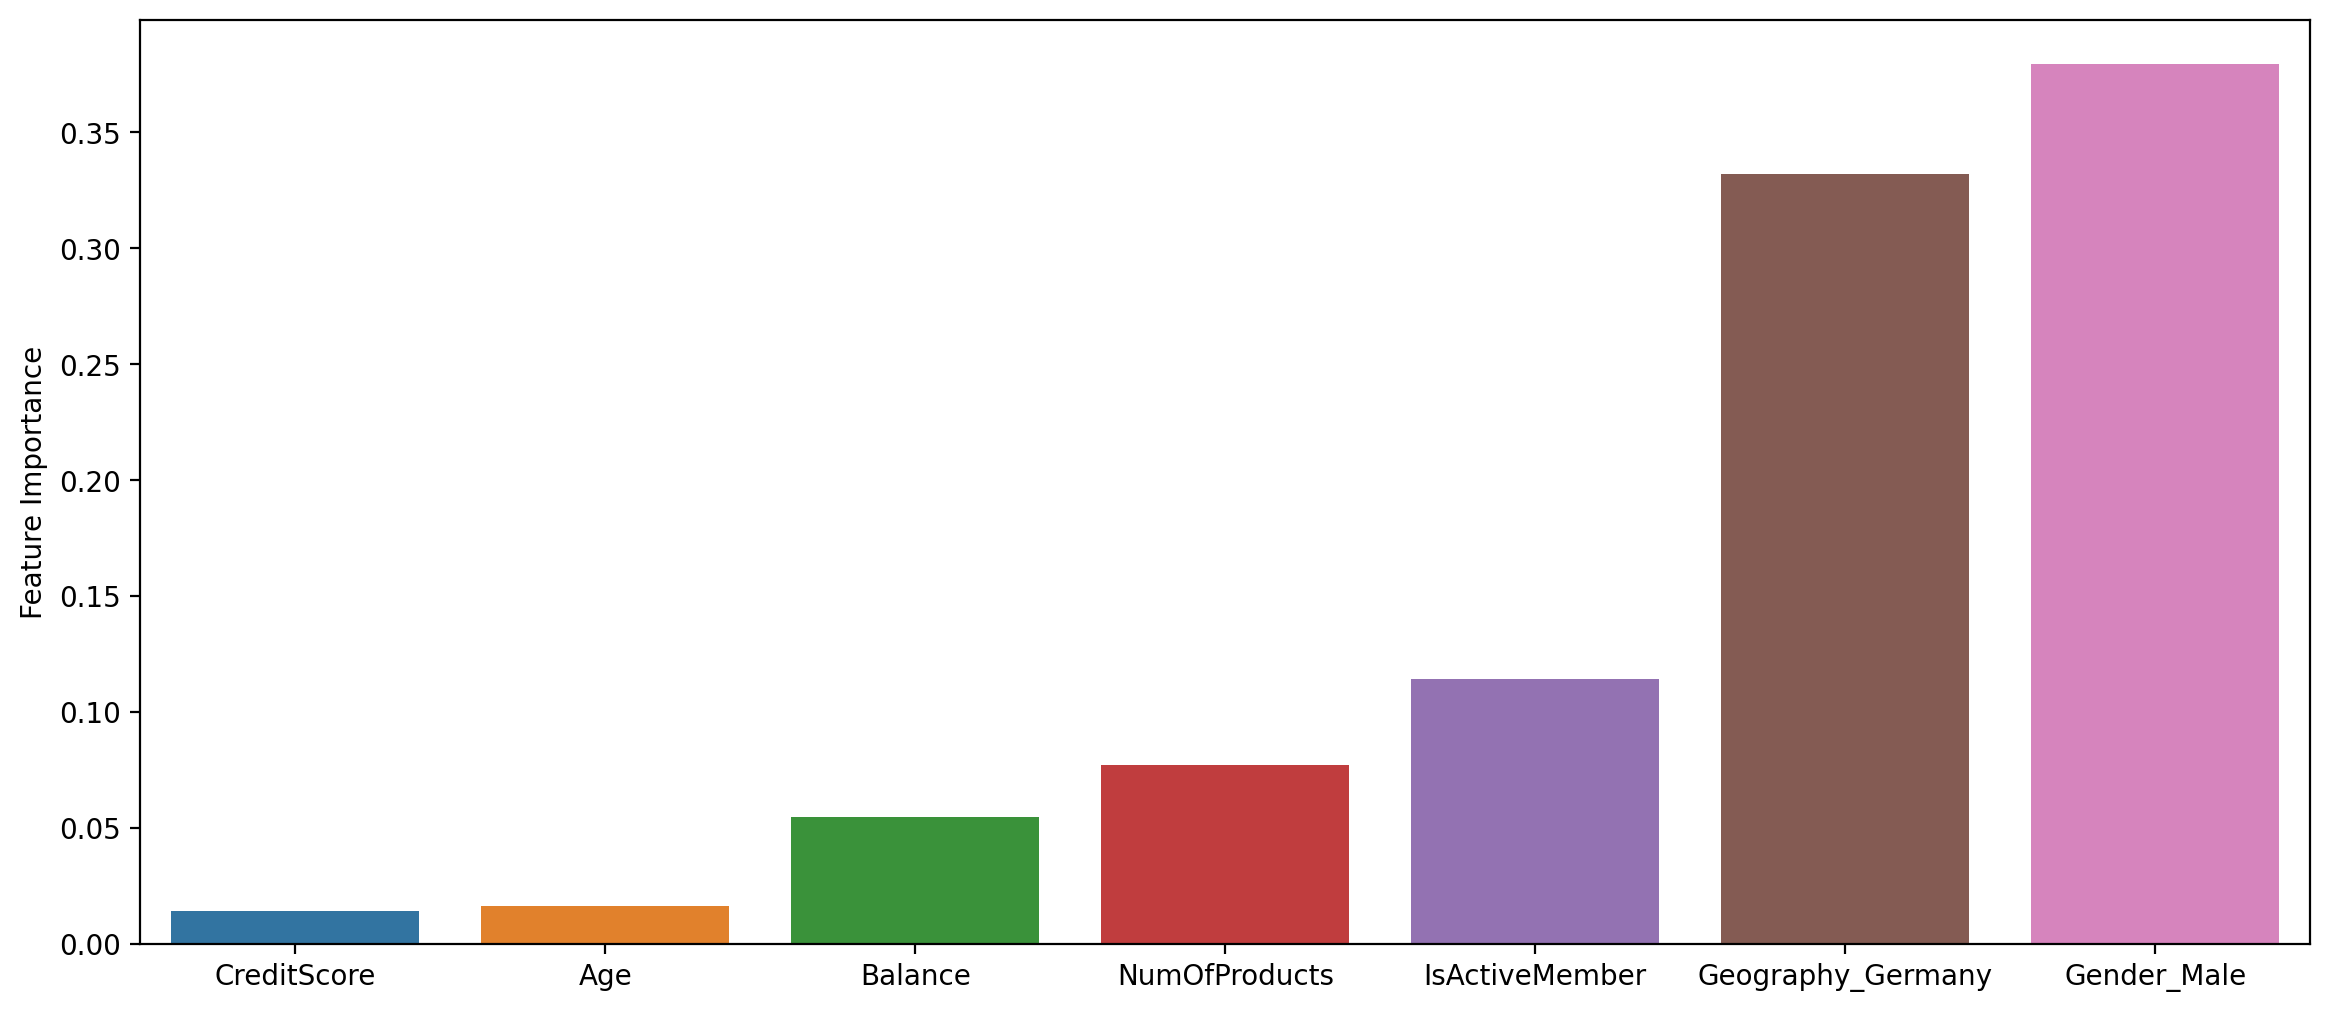

In [97]:
print(M7.feature_importances_)
i=pd.DataFrame(index=X.columns,data=M7.feature_importances_,columns=["Feature Importance"])
print(i)
i=i[i["Feature Importance"]>0.01]
print(i.sort_values("Feature Importance",ascending=False))
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=i.sort_values("Feature Importance"),x=i.index,y="Feature Importance")
plt.show()

In [98]:
i=i[i["Feature Importance"]>0.01]
i

Feature Importance
CreditScore                  0.016415
Age                          0.379742
Balance                      0.076959
NumOfProducts                0.332267
IsActiveMember               0.113968
Geography_Germany            0.054676
Gender_Male                  0.013834

### XG Boosting
- XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. 
- It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. 
- XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

##### XB Boosting Calssifier with default Parameters

In [99]:
## Modeling
from xgboost import XGBClassifier
M8=XGBClassifier()
M8.fit(X_train,y_train)
## Prediction
y_p_train8=M8.predict(X_train)
y_p_test8=M8.predict(X_test)
## Evaluation
print(accuracy_score(y_train,y_p_train8))
print(accuracy_score(y_test,y_p_test8))
## Confusion Matrix
print(confusion_matrix(y_test,y_p_test8))
## Classification Report
print(classification_report(y_test,y_p_test8))
# Cross Validation Score
scores=cross_val_score(M8,X,y,cv=5)
print(scores,scores.mean())

0.958
0.851
[[2223  155]
 [ 292  330]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2378
           1       0.68      0.53      0.60       622

    accuracy                           0.85      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000

[0.8555 0.8585 0.8525 0.8585 0.851 ] 0.8552


##### HyperParameter Tuning

In [100]:
#from sklearn.model_selection import GridSearchCV
#estimator=XGBClassifier() #{'gamma': 1, 'max_depth': 3, 'n_estimators': 100}
#param_grid={"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6],'gamma':[0.1,0.2,0.3,0.5,0.8,1]}  
#grid=GridSearchCV(estimator,param_grid,cv=5, scoring="accuracy")
#grid.fit(X_train,y_train)
#grid.best_params_

##### Final Model with best Parameters

In [101]:
## Modeling
M8=XGBClassifier(n_estimators=100,gamma=1,max_depth=3)
M8.fit(X_train,y_train)
## Prediction
y_p_train8=M8.predict(X_train)
y_p_test8=M8.predict(X_test)
## Evaluation/accuracy
print(accuracy_score(y_train,y_p_train8))
print(accuracy_score(y_test,y_p_test8))
# Cross Validation Score
scores=cross_val_score(M8,X,y,cv=5)
print(scores,scores.mean())

0.8721428571428571
0.8666666666666667
[0.8685 0.872  0.8585 0.869  0.854 ] 0.8644000000000001


##### Feature Importance

[0.02124415 0.19205742 0.02306271 0.06427764 0.2037479  0.0159563
 0.23514819 0.02340599 0.12594393 0.01931879 0.07583699]
                   Feature Importance
CreditScore                  0.021244
Age                          0.192057
Tenure                       0.023063
Balance                      0.064278
NumOfProducts                0.203748
HasCrCard                    0.015956
IsActiveMember               0.235148
EstimatedSalary              0.023406
Geography_Germany            0.125944
Geography_Spain              0.019319
Gender_Male                  0.075837
                   Feature Importance
IsActiveMember               0.235148
NumOfProducts                0.203748
Age                          0.192057
Geography_Germany            0.125944
Gender_Male                  0.075837
Balance                      0.064278
EstimatedSalary              0.023406
Tenure                       0.023063
CreditScore                  0.021244
Geography_Spain              0.019319
Has

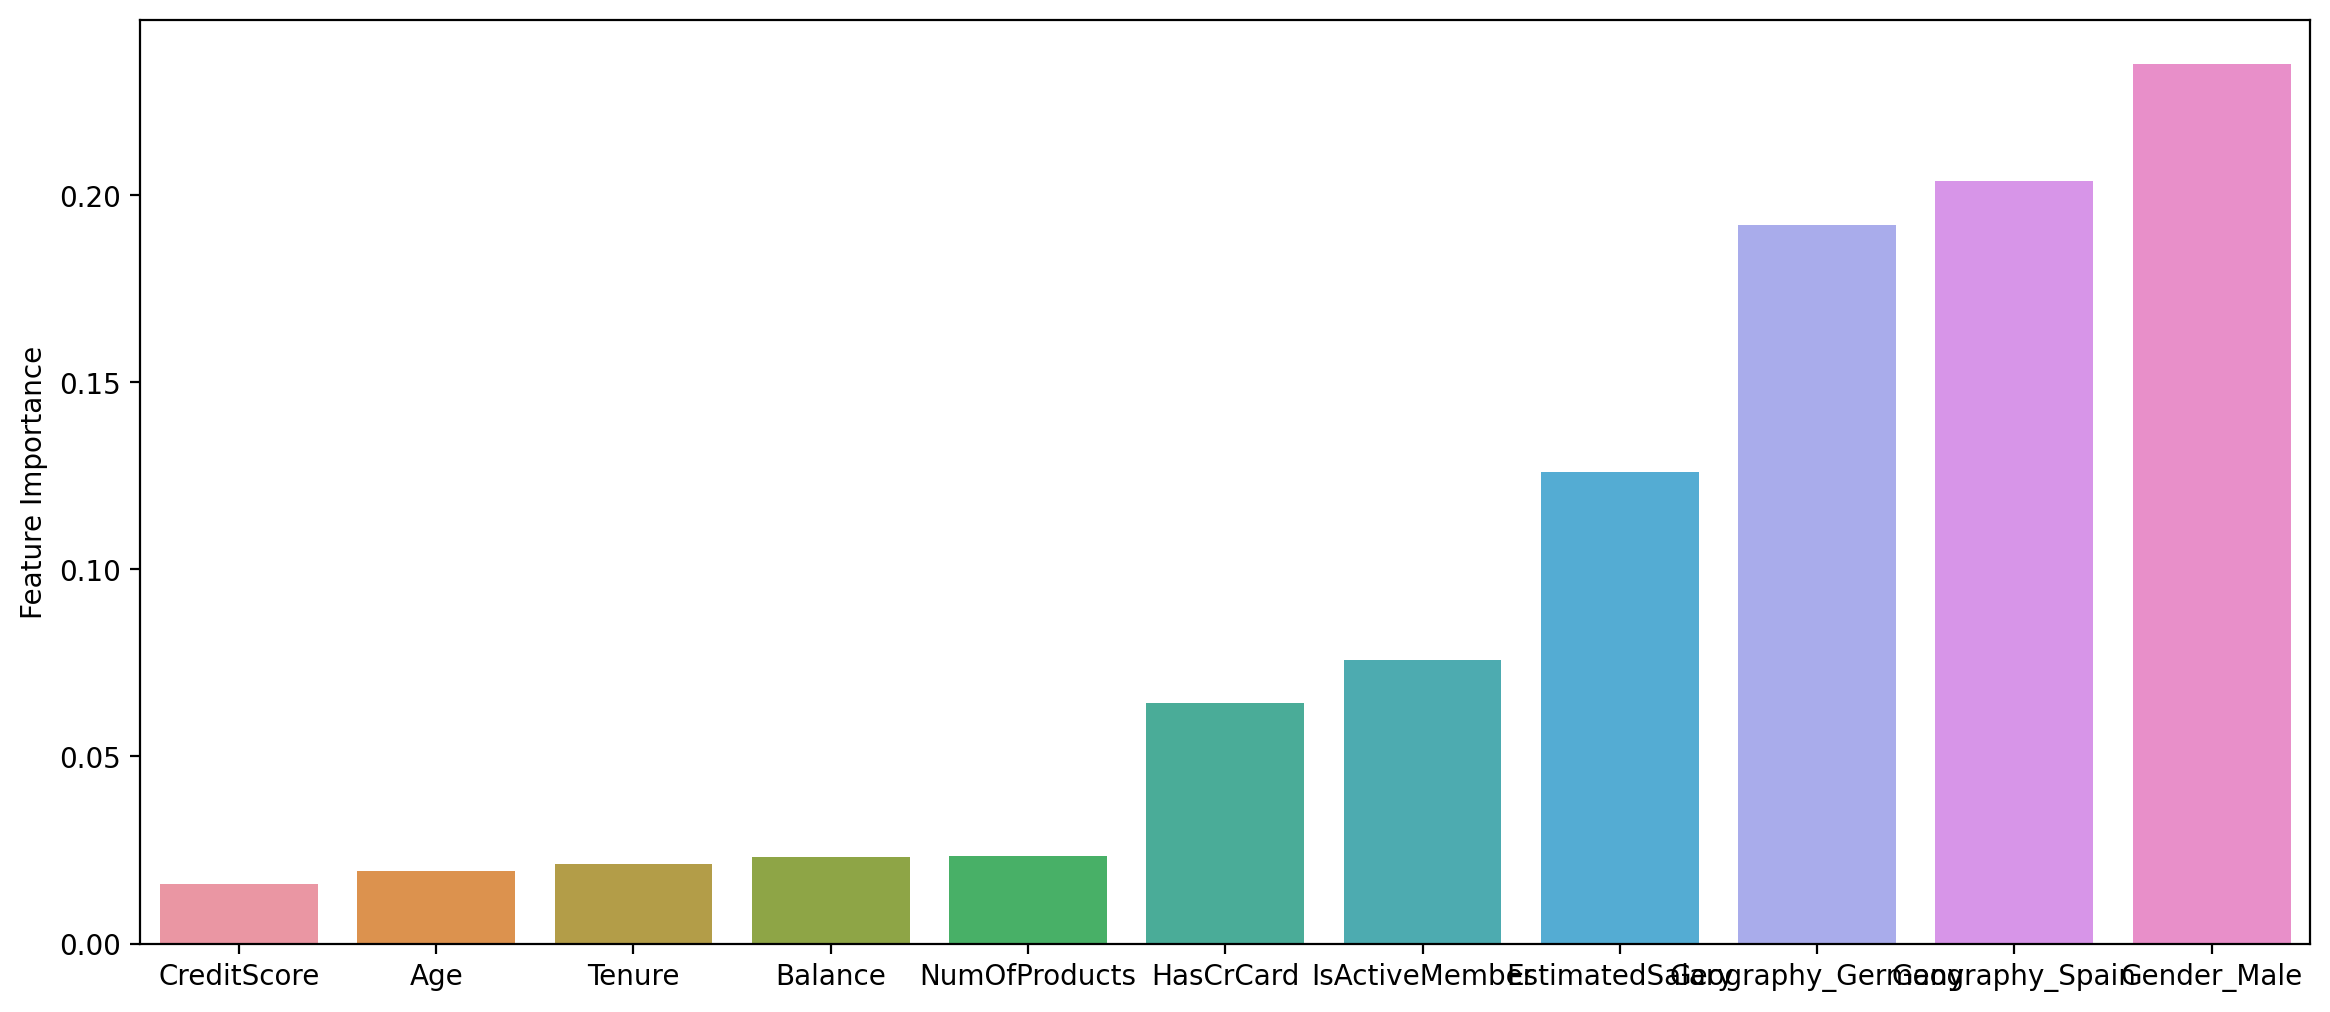

In [102]:
print(M8.feature_importances_)
i=pd.DataFrame(index=X.columns,data=M8.feature_importances_,columns=["Feature Importance"])
print(i)
print(i.sort_values("Feature Importance",ascending=False))
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=i.sort_values("Feature Importance"),x=i.index,y="Feature Importance")
plt.show()

### Accuracy Summary
- By performing all Supervised Machine Learning Algorithms, we come to know that Random Forest, AdaBoost, Gradient Boosting and XG Boosting has a  better performance Accuracy.
- Among all this model XG Boost has a high accuracy.

In [103]:
performance_summary = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','ABC','GBC','XGB'],'ACC':[accuracy_score(y_test,y_p_test1),
           accuracy_score(y_test,y_p_test2),
           accuracy_score(y_test,y_p_test3),
           accuracy_score(y_test,y_p_test4),
           accuracy_score(y_test,y_p_test5),
           accuracy_score(y_test,y_p_test6),
           accuracy_score(y_test,y_p_test7),
           accuracy_score(y_test,y_p_test8)]})
performance_summary

Model       ACC
0    LR  0.805000
1   SVC  0.851667
2   KNN  0.833000
3    DT  0.797667
4    RF  0.864000
5   ABC  0.860333
6   GBC  0.862333
7   XGB  0.866667

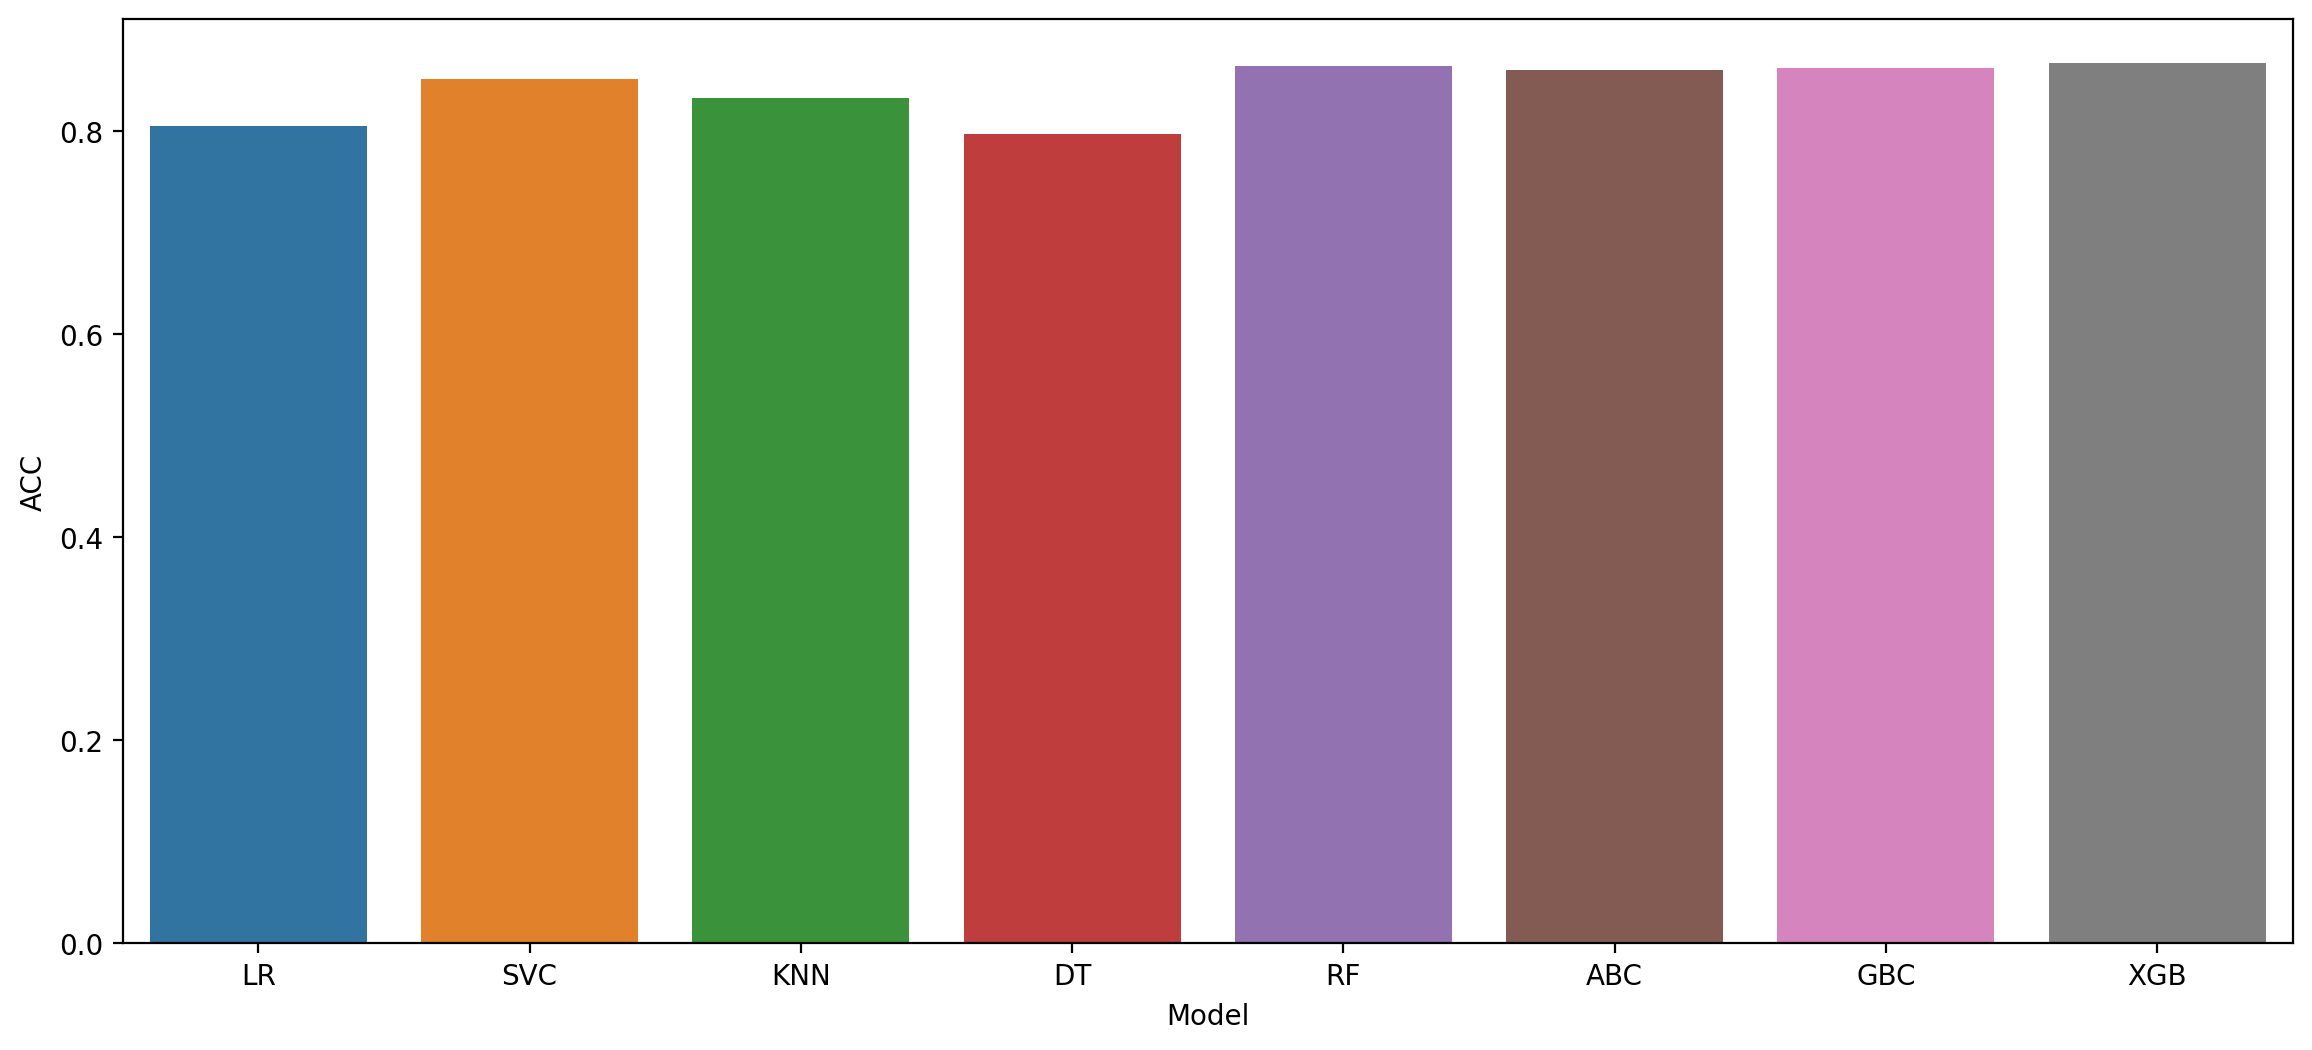

In [104]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=performance_summary,x='Model',y="ACC")
plt.show()

### Precision Summary

In [105]:
from sklearn.metrics import precision_score
performance_summary = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','ABC','GBC','XGB'],'PRECISION':[precision_score(y_test,y_p_test1),
           precision_score(y_test,y_p_test2),
           precision_score(y_test,y_p_test3),
           precision_score(y_test,y_p_test4),
           precision_score(y_test,y_p_test5),
           precision_score(y_test,y_p_test6),
           precision_score(y_test,y_p_test7),
           precision_score(y_test,y_p_test8)]})
performance_summary

Model  PRECISION
0    LR   0.589372
1   SVC   0.824176
2   KNN   0.733591
3    DT   0.511521
4    RF   0.771574
5   ABC   0.736597
6   GBC   0.767263
7   XGB   0.780303

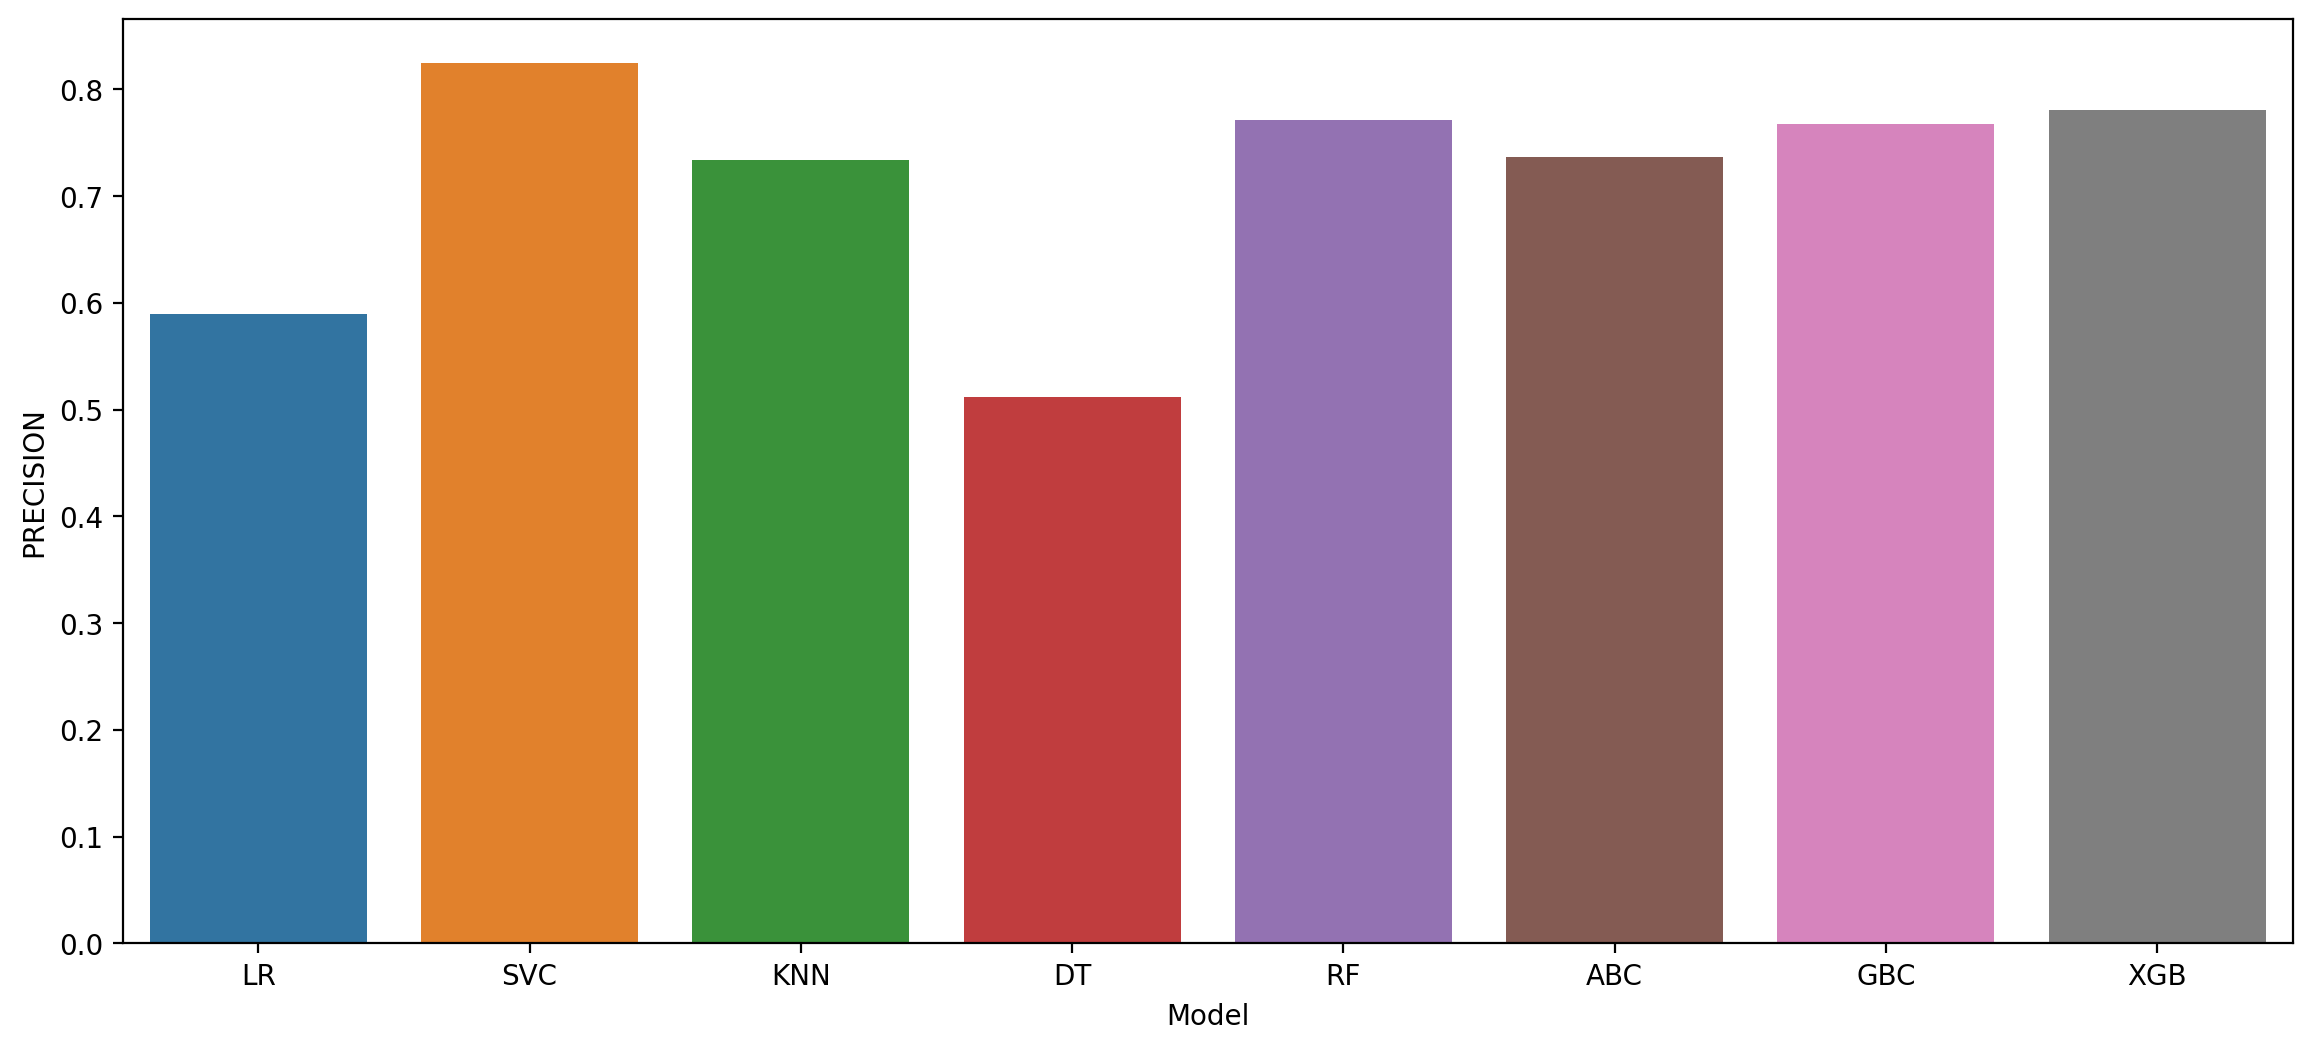

In [106]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=performance_summary,x='Model',y="PRECISION")
plt.show()

### Saving the best model, XGBoost

In [107]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
import joblib

In [109]:
joblib.dump(model_xgb, 'churn_predict_model.joblib')

['churn_predict_model.joblib']

In [110]:
model=joblib.load('churn_predict_model.joblib')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Conclusion
- In the project we solve the client problem by applying different Machine Learning Algorithms.
- We import the dataset, did Data Preprocessing by doing EDA, Data Cleaning, Removing nulls , Visualization of each datapoint, Feature Scaling.
- Divide the dataset by applying 'train_test_split' function for Training and Testing purpose.
- By using different algorithm , we fit the Model , predit the Model and get the Accuracy, Cross Validation score, Confusion matrix, Classification Report of each Model.
- By doing HyperParameter Tuning we get the best parameter from the each algorithm and we apply to each model.
- In  this project we use the Machine Learning Algorithms of Logistic Regression, Support Vector Machine(SVM),K-Nearest Neighbor(KNN), Descision Tree, Random Forest, Ada Boost, Gradient Boost,XG Boost etc..
- From each model we get the accuracy of Logistic Regression (0.805000), Support Vector Machine(SVM) (0.851667),K-Nearest Neighbor(KNN) (0.83300),Descision Tree (0.797667), Random Forest(0.865000),Ada Boost (0.860333), Gradient Boost(0.862333),XG Boost(0.866667).
- From all the algorithms we get the overall accuracy of (0.86) from Random Forest, Ada Boost, Gradient Boost, XG Boost.
- We get the overall accuracy from the XG Boost Algorithm (0.866667).
